# Prediction of loan defaulters and modelling defaulter's behaviour

# Loading the required libraries

In [98]:
import pandas as pd
import random
import seaborn as sns
import matplotlib.pyplot as plt
import plotnine
import plotly.express as px
import plotly.graph_objects as go
from scipy.stats import chi2_contingency
import numpy as np
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif, mutual_info_classif, chi2, mutual_info_regression
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.impute import KNNImputer
import gc
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score, make_scorer,roc_curve
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import StratifiedKFold, cross_val_score
import lightgbm as lgb
from catboost import CatBoostClassifier, Pool
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif, mutual_info_classif, chi2, mutual_info_regression
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

from scipy.stats import chi2_contingency
import numpy as np
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif, mutual_info_classif, chi2, mutual_info_regression
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.impute import KNNImputer
import gc
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Reading the merged output dataset of the given training and additional dataset

In [3]:
data = pd.read_csv("C://Users//91836//Documents//My Tableau Prep Repository//Datasources//Output.csv")

c:\users\91836\appdata\local\programs\python\python38\lib\site-packages\IPython\core\interactiveshell.py:3417: DtypeWarning: Columns (20,50,60,119,130,131,132,135,136,137,140,146,147,148) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [132]:
data.shape

(998622, 199)

In [4]:
train_data = data.loc[data['Table Names'] != 'testA.xlsx/in',:].copy()

In [5]:
test_data = data.loc[data['Table Names'] == 'testA.xlsx/in',:].copy()

# Data Cleaning and preprocessing

## Training Data

## Handling incorrect formats and inaccuracies in data

In [6]:
train_data = train_data.drop(['Table Names'],axis=1)

train_data = train_data.drop(['id-1'],axis=1)

train_data = train_data.drop(['member_id'],axis=1)

train_data = train_data.drop(['term-1'],axis=1)

train_data = train_data.drop(['int_rate'],axis=1)

train_data = train_data.drop(['installment-1'],axis=1)

train_data = train_data.drop(['grade-1'],axis=1)

train_data = train_data.drop(['sub_grade'],axis=1)

train_data = train_data.drop(['emp_title'],axis=1)

train_data = train_data.drop(['emp_length'],axis=1)

conditions = [
    (train_data['employmentLength'] == '< 1 year'),
    (train_data['employmentLength'] == '1 year'),
    (train_data['employmentLength'] == '2 years'),
    (train_data['employmentLength'] == '3 years'),
    (train_data['employmentLength'] == '4 years'),
    (train_data['employmentLength'] == '5 years'),
    (train_data['employmentLength'] == '6 year'),
    (train_data['employmentLength'] == '7 years'),
    (train_data['employmentLength'] == '8 years'),
    (train_data['employmentLength'] == '9 years'),
    (train_data['employmentLength'] == '10+ years'),
    (train_data['employmentLength'].isna())
]

# create a list of the values we want to assign for each condition
values = [0,1,2,3,4,5,6,7,8,9,10,11]

# create a new column and use np.select to assign values to it using our lists as arguments
train_data['employmentLength'] = np.select(conditions, values)

train_data = train_data.loc[train_data['employmentLength'] != 11,:]

train_data = train_data.drop(['desc'],axis=1)

train_data = train_data.drop(['mths_since_last_delinq'],axis=1)

train_data = train_data.drop(['mths_since_last_record'],axis=1)

train_data = train_data.drop(['next_pymnt_d'],axis=1)

train_data = train_data.drop(['mths_since_last_major_derog'],axis=1)

train_data = train_data.drop(['open_acc_6m'],axis=1)

train_data = train_data.drop(['open_act_il'],axis=1)

train_data = train_data.drop(['open_il_12m'],axis=1)

train_data = train_data.drop(['open_il_24m'],axis=1)

train_data = train_data.drop(['mths_since_rcnt_il'],axis=1)

train_data = train_data.drop(['total_bal_il'],axis=1)

train_data = train_data.drop(['il_util'],axis=1)

train_data = train_data.drop(['open_rv_12m'],axis=1)

train_data = train_data.drop(['open_rv_24m'],axis=1)

train_data = train_data.drop(['max_bal_bc'],axis=1)

train_data = train_data.drop(['all_util'],axis=1)

train_data = train_data.drop(['inq_fi'],axis=1)

train_data = train_data.drop(['total_cu_tl'],axis=1)

train_data = train_data.drop(['inq_last_12m'],axis=1)

train_data = train_data.drop(['mths_since_recent_bc_dlq'],axis=1)

train_data = train_data.drop(['mths_since_recent_revol_delinq'],axis=1)

train_data['annualIncome'] = train_data.apply(lambda df: df.annual_inc_joint if df.application_type == 'Joint App' else df.annualIncome, axis =1)

train_data['dti'] = train_data.apply(lambda df: df.dti_joint if df.application_type == 'Joint App' else df.dti, axis =1)
train_data['verificationStatus'] = train_data.apply(lambda df: df.verification_status_joint if df.application_type == 'Joint App' else df.verificationStatus, axis =1)

train_data = train_data.loc[train_data['dti'].notna(),:]

train_data = train_data.loc[train_data['verificationStatus'].notna(),:]

train_data = train_data.drop(['annual_inc_joint'],axis=1)

train_data = train_data.drop(['dti_joint'],axis=1)

train_data = train_data.drop(['verification_status_joint'],axis=1)

home_ownership_mapping = dict(zip([val for val in train_data.homeOwnership.value_counts().index],[val for val in train_data.home_ownership.value_counts().index]))


train_data = train_data.drop(['home_ownership'],axis=1)

train_data = train_data.drop(['annual_inc'],axis=1)

train_data = train_data.drop(['verification_status'],axis=1)

train_data = train_data.drop(['issueDate'],axis=1)

train_data = train_data.drop(['pymnt_plan'],axis=1)

train_data = train_data.drop(['url'],axis=1)

purpose_mapping = dict(zip([val for val in train_data.purpose.value_counts().index],[val for val in train_data['purpose-1'].value_counts().index]))


train_data = train_data.drop(['purpose-1'],axis=1)

title_mapping = dict(zip([val for val in train_data.title.value_counts().index],[val for val in train_data['title-1'].value_counts().index]))

train_data = train_data.drop(['title-1'],axis=1)

train_data = train_data.loc[train_data['title'].notna(),:]

state_mapping = dict(zip([val for val in train_data.addr_state.value_counts().index],[val for val in train_data['regionCode'].value_counts().index]))

train_data = train_data.drop(['addr_state'],axis=1)

train_data = train_data.drop(['dti-1'],axis=1)

train_data = train_data.drop(['delinq_2yrs'],axis=1)

train_data = train_data.drop(['earliest_cr_line'],axis=1)

train_data["earliesCreditLine_month"] = pd.to_datetime(train_data.earliesCreditLine).dt.month

train_data["earliesCreditLine_year"] = pd.to_datetime(train_data.earliesCreditLine).dt.year

train_data["issue_d_month"] = pd.to_datetime(train_data.issue_d).dt.month

train_data["issue_d_year"] = pd.to_datetime(train_data.issue_d).dt.year

train_data = train_data.drop(['fico_range_low'],axis=1)

train_data = train_data.drop(['fico_range_high'],axis=1)

train_data = train_data.drop(['open_acc'],axis=1)

train_data = train_data.drop(['pub_rec'],axis=1)

train_data = train_data.drop(['revol_bal'],axis=1)

train_data = train_data.drop(['revol_util'],axis=1)

train_data = train_data.drop(['total_acc'],axis=1)

initial_list_status_mapping = dict(zip([val for val in train_data.initial_list_status.value_counts().index],[val for val in train_data['initialListStatus'].value_counts().index]))

train_data = train_data.drop(['initial_list_status'],axis=1)

train_data = train_data.drop(['out_prncp'],axis=1)

train_data = train_data.drop(['acc_now_delinq'],axis=1)

train_data = train_data.drop(['chargeoff_within_12_mths'],axis=1)

train_data = train_data.drop(['delinq_amnt'],axis=1)

train_data.loc[train_data.pubRecBankruptcies.isna(),'pubRecBankruptcies' ] = train_data.pubRecBankruptcies.value_counts().index[0]

train_data = train_data.drop(['pub_rec_bankruptcies'],axis=1)

train_data = train_data.drop(['hardship_flag'],axis=1)

train_data = train_data.drop(['debt_settlement_flag'],axis=1)

train_data = train_data.drop(['debt_settlement_flag_date'],axis=1)

train_data = train_data.drop(['settlement_status'],axis=1)

train_data = train_data.drop(['settlement_date'],axis=1)

train_data = train_data.drop(['settlement_percentage'],axis=1)

train_data = train_data.drop(['settlement_term'],axis=1)

train_data = train_data.drop(['n0'],axis=1)

train_data = train_data.drop(['n1'],axis=1)

train_data = train_data.drop(['n2'],axis=1)

train_data = train_data.drop(['n3'],axis=1)

train_data = train_data.drop(['n4'],axis=1)

train_data = train_data.drop(['n5'],axis=1)

train_data = train_data.drop(['n6'],axis=1)

train_data = train_data.drop(['n7'],axis=1)

train_data = train_data.drop(['n8'],axis=1)

train_data = train_data.drop(['n9'],axis=1)

train_data = train_data.drop(['n10'],axis=1)

train_data = train_data.drop(['n11'],axis=1)

train_data = train_data.drop(['n12'],axis=1)

train_data = train_data.drop(['n13'],axis=1)

train_data = train_data.drop(['n14'],axis=1)


## Percentage of missing values

In [7]:
(train_data.isnull().sum() / train_data.shape[0] * 100)

loan_amnt                  0.0
funded_amnt                0.0
funded_amnt_inv            0.0
issue_d                    0.0
loan_status                0.0
                          ... 
isDefault                  0.0
earliesCreditLine_month    0.0
earliesCreditLine_year     0.0
issue_d_month              0.0
issue_d_year               0.0
Length: 122, dtype: float64

## Handling missing values

In [8]:
train_data = train_data.loc[train_data.employmentTitle.notna(),:]

train_data = train_data.loc[train_data['zip_code'].notna(),:]

train_data = train_data.loc[train_data['inq_last_6mths'].notna(),:]

train_data = train_data.loc[train_data['last_pymnt_d'].notna(),:]

train_data = train_data.loc[train_data['last_credit_pull_d'].notna(),:]

train_data = train_data.loc[train_data['collections_12_mths_ex_med'].notna(),:]

train_data = train_data.loc[train_data['tot_coll_amt'].notna(),:]

train_data = train_data.loc[train_data['bc_open_to_buy'].notna(),:]

train_data = train_data.loc[train_data['bc_util'].notna(),:]

train_data = train_data.loc[train_data['mo_sin_old_il_acct'].notna(),:]

train_data = train_data.loc[train_data['mths_since_recent_bc'].notna(),:]

train_data.loc[train_data.mths_since_recent_inq.isna(),'mths_since_recent_inq'] =  train_data.mths_since_recent_inq.value_counts().index[0]

train_data = train_data.loc[data['num_rev_accts'].notna(),:]

train_data.loc[train_data.num_tl_120dpd_2m.isna(),'num_tl_120dpd_2m'] =  train_data.num_tl_120dpd_2m.value_counts().index[0]

train_data = train_data.loc[train_data['pct_tl_nvr_dlq'].notna(),:]

train_data = train_data.loc[train_data['percent_bc_gt_75'].notna(),:]

train_data = train_data.loc[train_data['pubRecBankruptcies'].notna(),:]

In [9]:
train_data = train_data.loc[train_data['zip_code'].notna(),:]

train_data = train_data.loc[train_data['inq_last_6mths'].notna(),:]

train_data = train_data.loc[train_data['last_pymnt_d'].notna(),:]

train_data = train_data.loc[train_data['last_credit_pull_d'].notna(),:]

train_data = train_data.loc[train_data['collections_12_mths_ex_med'].notna(),:]

train_data = train_data.loc[train_data['employmentTitle'].notna(),:]

train_data = train_data.loc[train_data['postCode'].notna(),:]

train_data = train_data.drop(['revol_bal_joint'],axis=1)

train_data = train_data.drop(['sec_app_fico_range_low'],axis=1)

train_data = train_data.drop(['sec_app_fico_range_high'],axis=1)

train_data = train_data.drop(['sec_app_earliest_cr_line'],axis=1)

train_data = train_data.drop(['sec_app_inq_last_6mths'],axis=1)

train_data = train_data.dropna(thresh=500000, axis=1)

train_data  = train_data.loc[train_data['tot_coll_amt'].notna(),:]

train_data  = train_data.loc[train_data['bc_open_to_buy'].notna(),:]

train_data  = train_data.loc[train_data['bc_util'].notna(),:]

train_data  = train_data.loc[train_data['mths_since_recent_bc'].notna(),:]

train_data  = train_data.loc[train_data['num_rev_accts'].notna(),:]

train_data  = train_data.loc[train_data['pct_tl_nvr_dlq'].notna(),:]

train_data  = train_data.loc[train_data['percent_bc_gt_75'].notna(),:]

train_data['mths_since_recent_inq'].fillna(train_data['mths_since_recent_inq'].median(), inplace=True)

train_data['mths_since_recent_inq'].fillna(train_data['mths_since_recent_inq'].median(), inplace=True)

train_data['mo_sin_old_il_acct'].fillna(train_data['mo_sin_old_il_acct'].median(), inplace=True)

train_data  = train_data.loc[train_data['num_tl_120dpd_2m'].notna(),:]

## Handling Outliers

<ipython-input-205-871150429ca3>:4: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



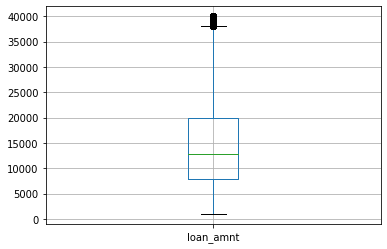

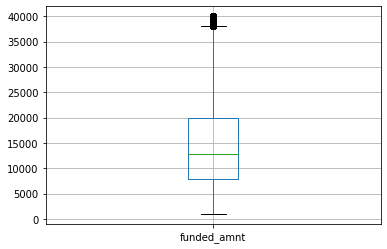

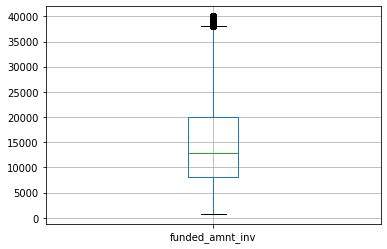

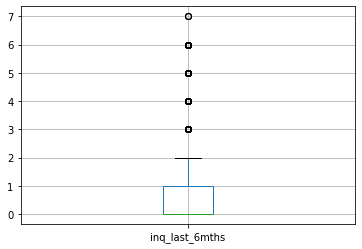

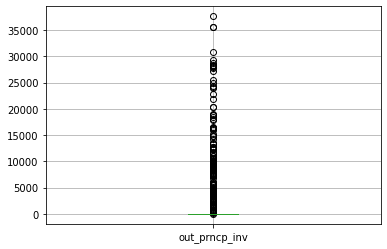

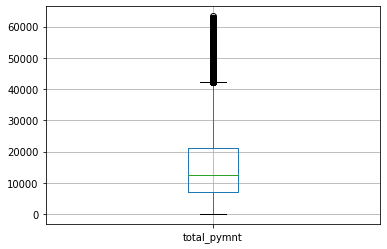

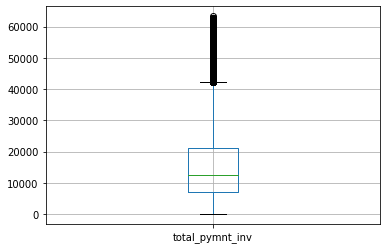

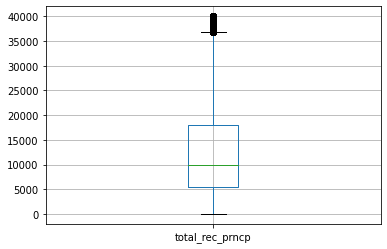

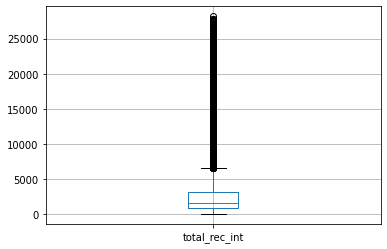

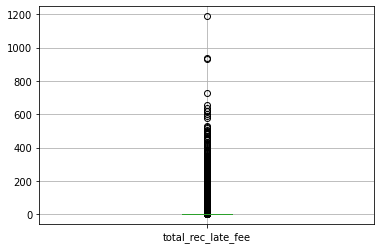

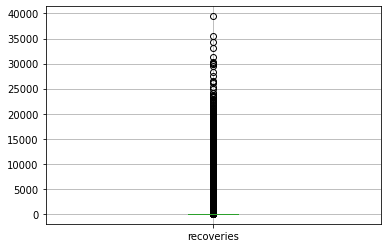

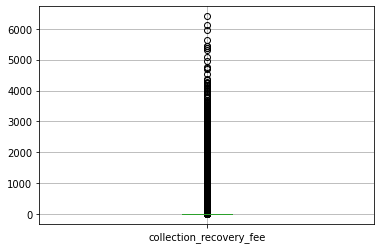

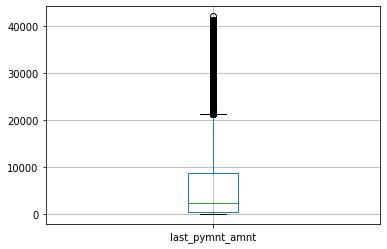

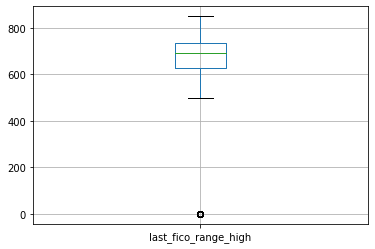

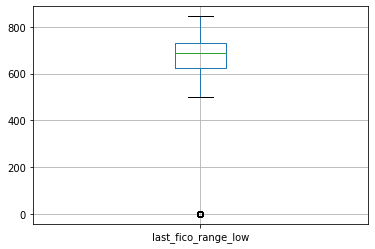

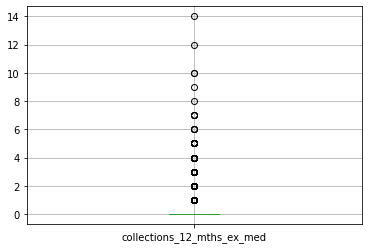

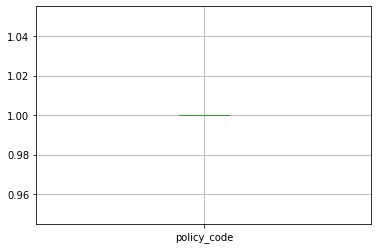

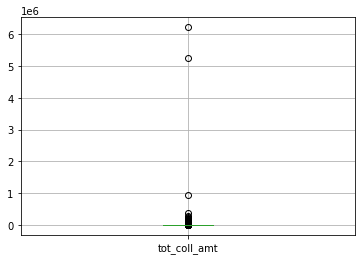

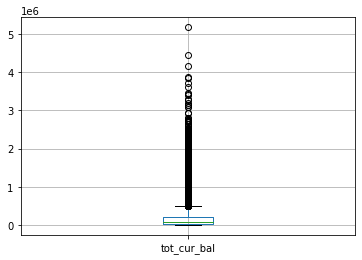

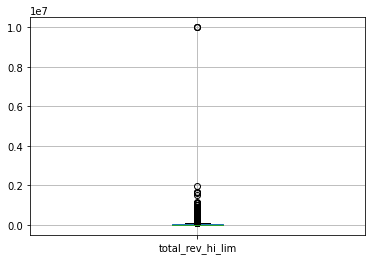

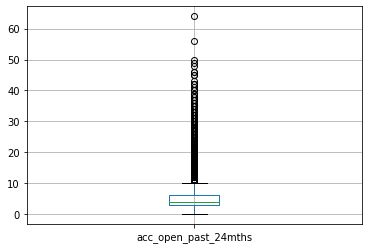

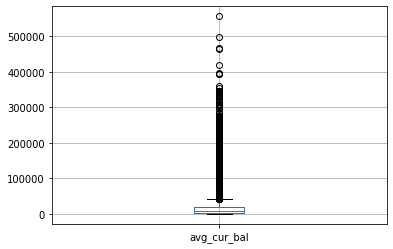

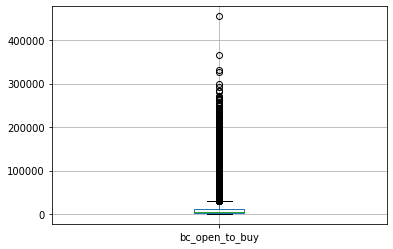

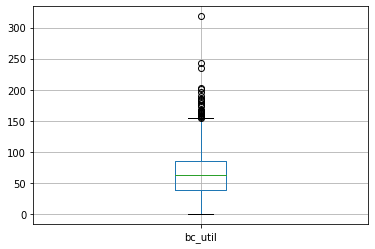

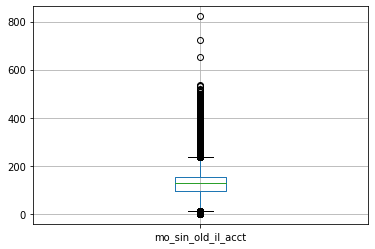

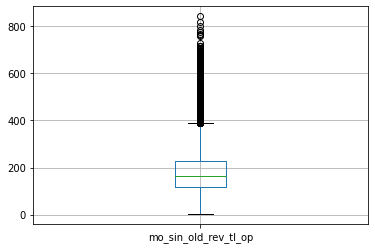

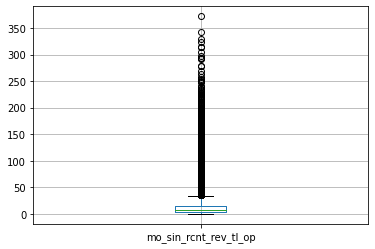

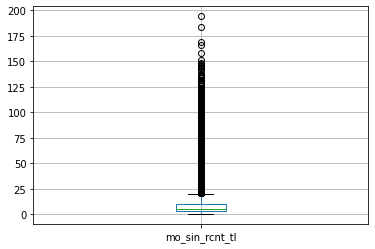

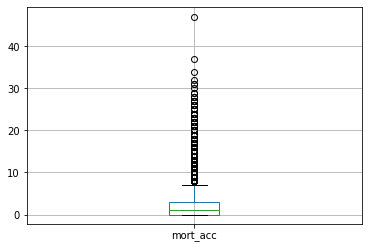

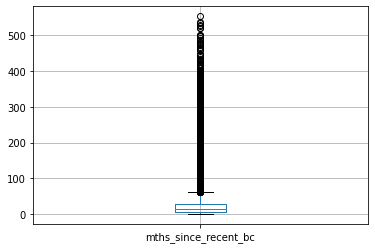

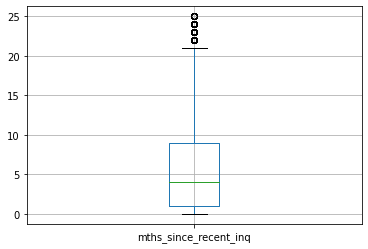

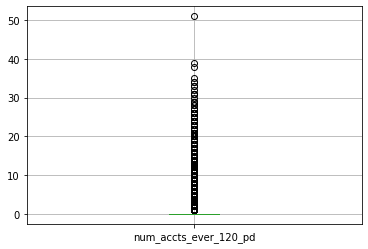

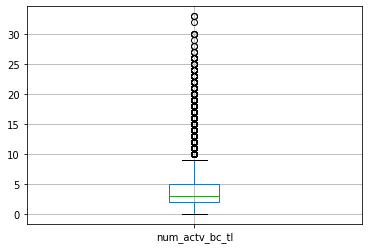

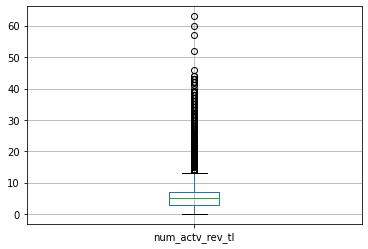

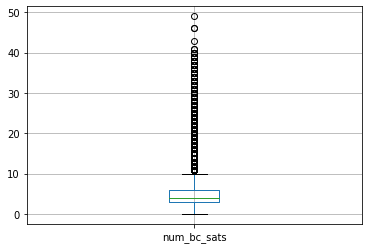

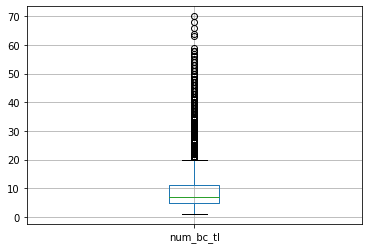

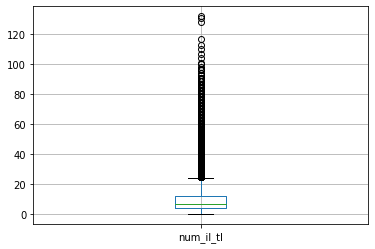

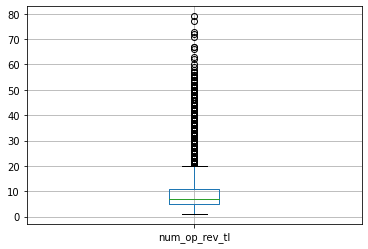

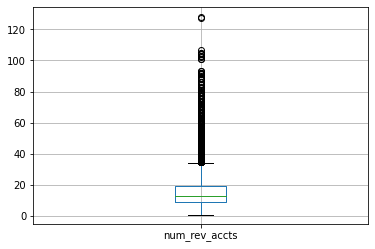

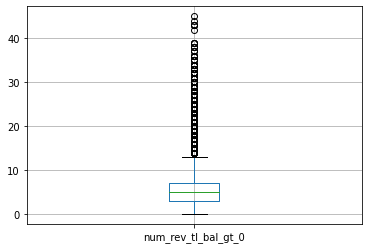

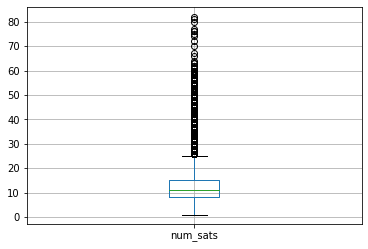

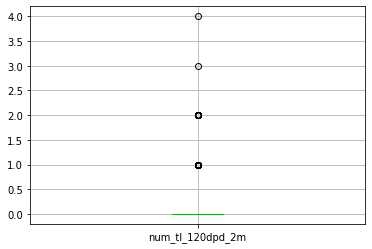

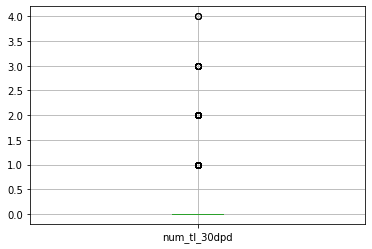

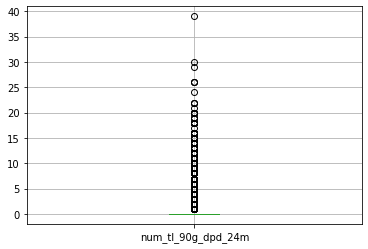

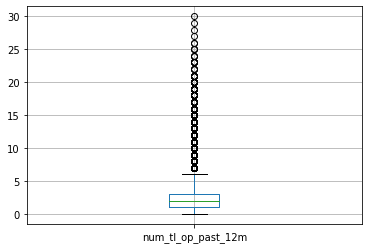

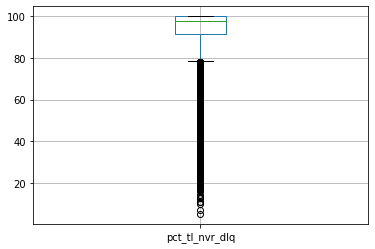

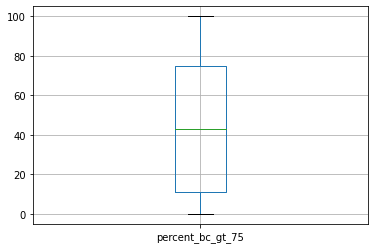

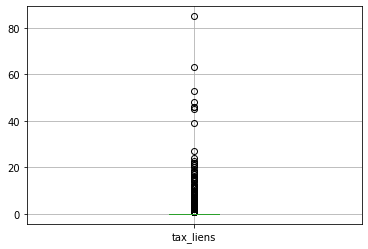

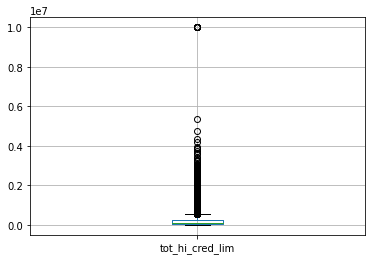

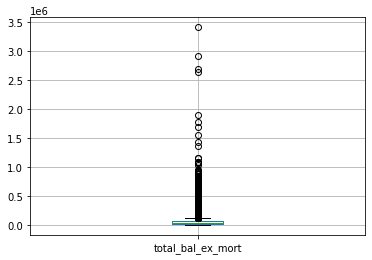

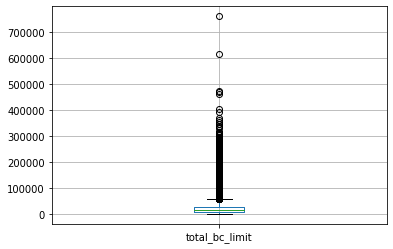

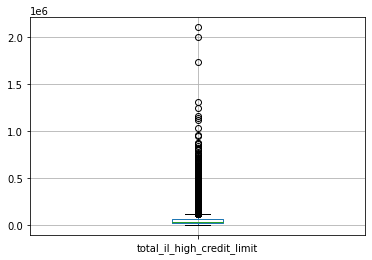

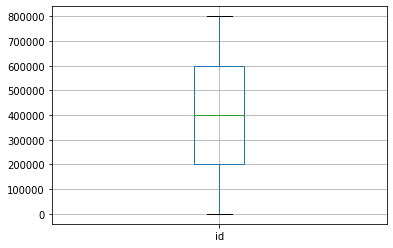

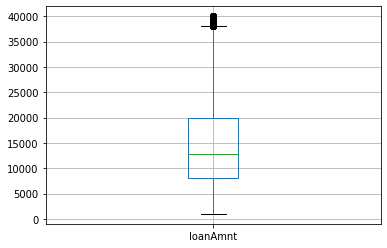

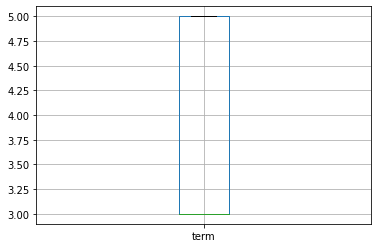

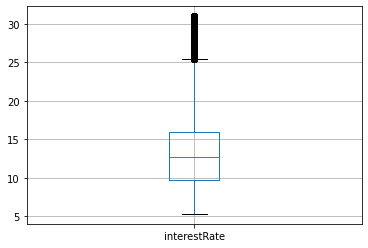

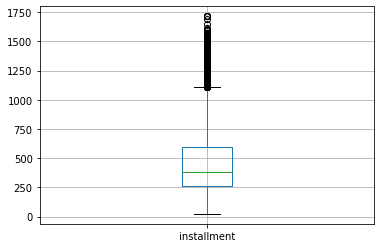

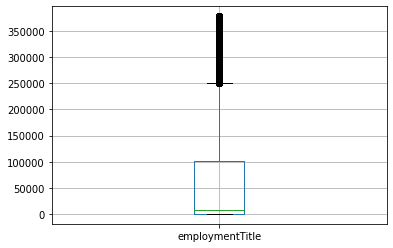

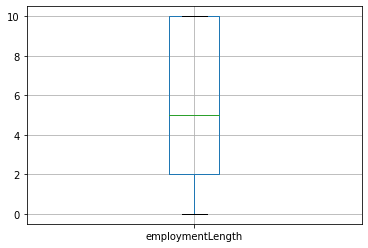

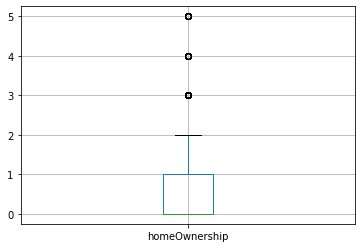

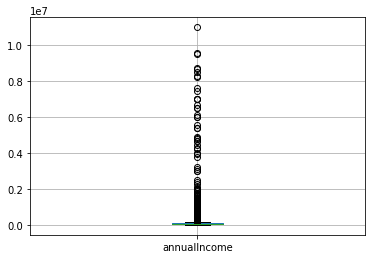

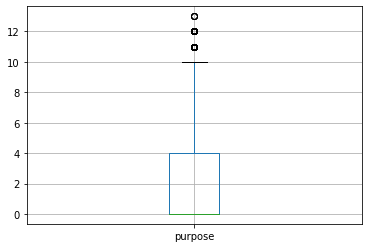

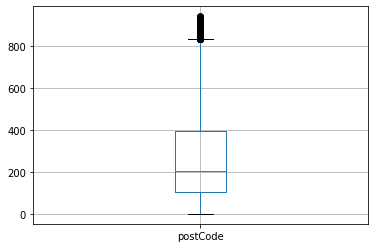

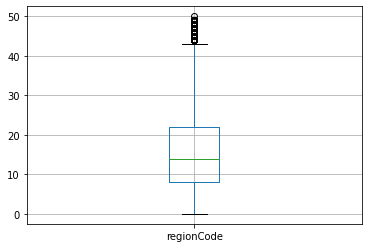

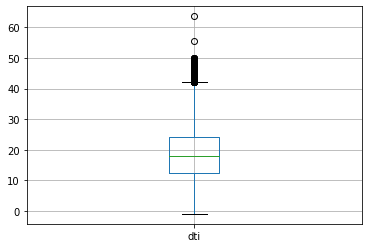

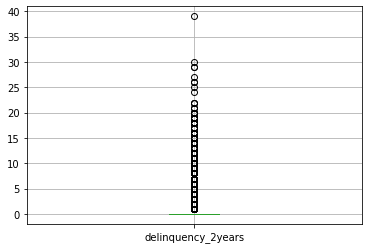

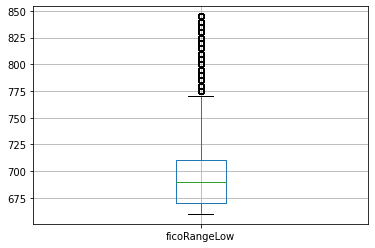

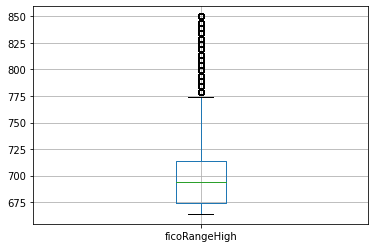

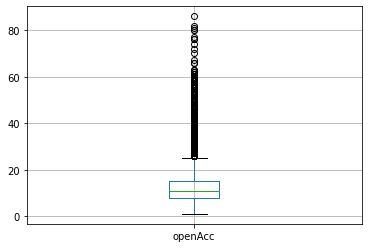

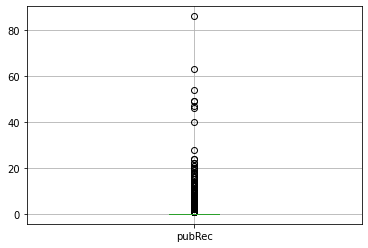

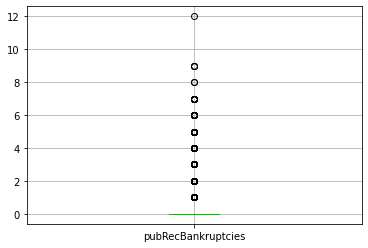

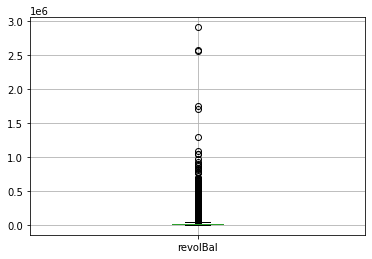

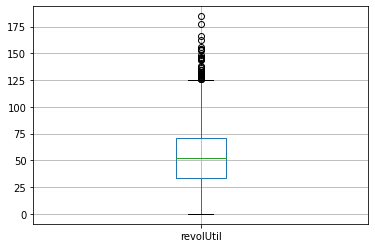

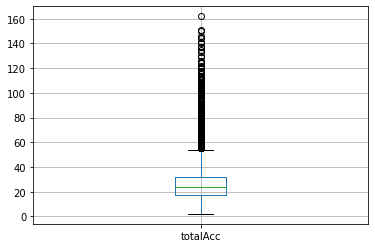

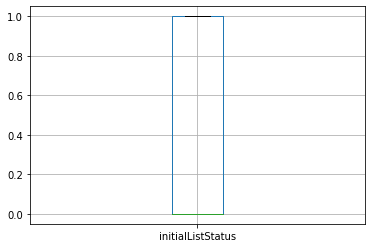

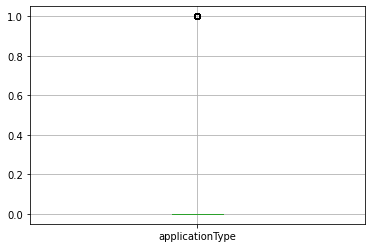

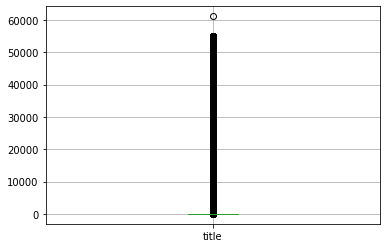

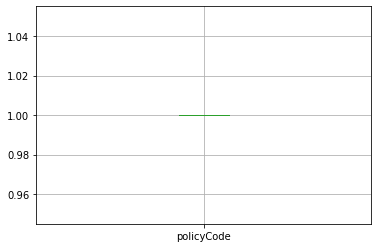

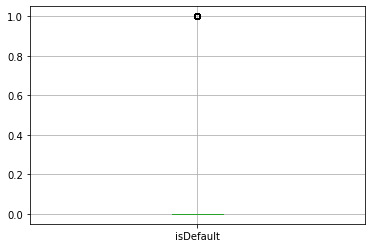

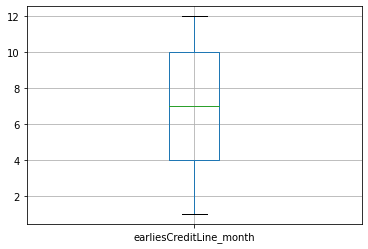

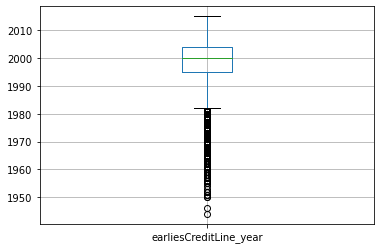

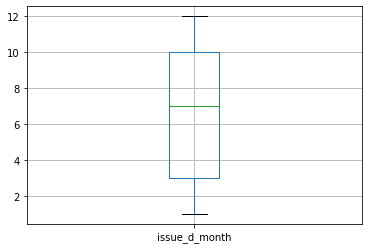

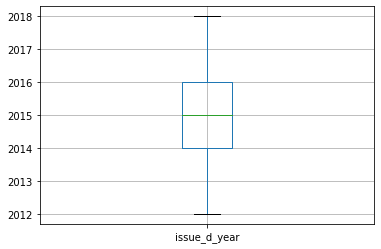

In [205]:
train_num_data=train_data.select_dtypes(exclude=['object'])

for column in train_num_data:
    plt.figure()
    train_num_data.boxplot([column])

In [10]:
train_data = train_data[train_data.last_fico_range_high != 0]

x = train_data.loc[:,'last_fico_range_low'].replace(0,300)
train_data.loc[:,'last_fico_range_low'] = x.copy()

train_data = train_data.loc[train_data.tot_coll_amt<37000,:]

train_data = train_data.loc[train_data.funded_amnt<37000,:]

train_data = train_data.loc[train_data.total_pymnt<45000,:]

train_data = train_data.loc[train_data.total_pymnt_inv<43000,:]

train_data = train_data.loc[train_data.total_rec_int<22000,:]

train_data = train_data.loc[train_data.total_rec_late_fee<550,:]

train_data = train_data.loc[train_data.recoveries<24000,:]

train_data = train_data.loc[train_data.last_pymnt_amnt<37000,:]

train_data = train_data.loc[train_data.tot_cur_bal<4000000,:]

train_data = train_data.loc[train_data.total_rev_hi_lim<8000000,:]

train_data = train_data.loc[train_data.acc_open_past_24mths<55,:]

train_data = train_data.loc[train_data.avg_cur_bal<370000,:]

train_data = train_data.loc[train_data.bc_open_to_buy<310000,:]

train_data = train_data.loc[train_data.mo_sin_old_il_acct<600,:]

train_data = train_data.loc[train_data.mo_sin_old_rev_tl_op<730,:]

train_data = train_data.loc[train_data.mo_sin_rcnt_rev_tl_op<330,:]

train_data = train_data.loc[train_data.mo_sin_rcnt_tl<200,:]

train_data = train_data.loc[train_data.mort_acc<27,:]

train_data = train_data.loc[train_data.mths_since_recent_bc<510,:]

train_data = train_data.loc[train_data.num_actv_rev_tl<40,:]

train_data = train_data.loc[train_data.num_bc_sats<40,:]

train_data = train_data.loc[train_data.num_bc_tl<60,:]

train_data = train_data.loc[train_data.num_il_tl<110,:]

train_data = train_data.loc[train_data.num_op_rev_tl<60,:]

train_data = train_data.loc[train_data.num_rev_accts<100,:]

train_data = train_data.loc[train_data.num_sats<70,:]

train_data = train_data.loc[train_data.num_tl_op_past_12m<27,:]

train_data = train_data.loc[train_data.tax_liens<80,:]

train_data = train_data.loc[train_data.total_bal_ex_mort<3000000,:]

train_data = train_data.loc[train_data.total_bc_limit<450000,:]

train_data = train_data.loc[train_data.total_il_high_credit_limit<1700000,:]

train_data = train_data.loc[train_data.annualIncome<8000000,:]

train_data = train_data.loc[train_data.dti<60,:]

train_data = train_data.loc[train_data.delinquency_2years<35,:]

train_data = train_data.loc[train_data.openAcc<65,:]

train_data = train_data.loc[train_data.pubRec<50,:]

train_data = train_data.loc[train_data.revolBal<1600000,:]

train_data = train_data.loc[train_data.revolUtil<175,:]

train_data = train_data.loc[train_data.total_rev_hi_lim<1500000,:]

train_data = train_data.loc[train_data.bc_util<225,:]

train_data = train_data.loc[train_data.mo_sin_old_il_acct<600,:]

train_data = train_data.loc[train_data.tax_liens<40,:]

train_data = train_data.loc[train_data.total_bal_ex_mort<1000000,:]

train_data = train_data.loc[train_data.total_bc_limit<375000,:]

train_data = train_data.loc[train_data.total_il_high_credit_limit<1200000,:]

## Test Dataset

In [178]:
test_data.shape

(198770, 199)

## Handling incorrect formats and inaccuracies in data

In [11]:
test_data = test_data.drop(['Table Names'],axis=1)

test_data = test_data.drop(['id-1'],axis=1)

test_data = test_data.drop(['member_id'],axis=1)

test_data = test_data.drop(['term-1'],axis=1)

test_data = test_data.drop(['int_rate'],axis=1)

test_data = test_data.drop(['installment-1'],axis=1)

test_data = test_data.drop(['grade-1'],axis=1)

test_data = test_data.drop(['sub_grade'],axis=1)

test_data = test_data.drop(['emp_title'],axis=1)

test_data = test_data.drop(['emp_length'],axis=1)

conditions = [
    (test_data['employmentLength'] == '< 1 year'),
    (test_data['employmentLength'] == '1 year'),
    (test_data['employmentLength'] == '2 years'),
    (test_data['employmentLength'] == '3 years'),
    (test_data['employmentLength'] == '4 years'),
    (test_data['employmentLength'] == '5 years'),
    (test_data['employmentLength'] == '6 year'),
    (test_data['employmentLength'] == '7 years'),
    (test_data['employmentLength'] == '8 years'),
    (test_data['employmentLength'] == '9 years'),
    (test_data['employmentLength'] == '10+ years'),
    (test_data['employmentLength'].isna())
]

# create a list of the values we want to assign for each condition
values = [0,1,2,3,4,5,6,7,8,9,10,11]

# create a new column and use np.select to assign values to it using our lists as arguments
test_data['employmentLength'] = np.select(conditions, values)

test_data = test_data.loc[test_data['employmentLength'] != 11,:]

test_data = test_data.drop(['desc'],axis=1)

test_data = test_data.drop(['mths_since_last_delinq'],axis=1)

test_data = test_data.drop(['mths_since_last_record'],axis=1)

test_data = test_data.drop(['next_pymnt_d'],axis=1)

test_data = test_data.drop(['mths_since_last_major_derog'],axis=1)

test_data = test_data.drop(['open_acc_6m'],axis=1)

test_data = test_data.drop(['open_act_il'],axis=1)

test_data = test_data.drop(['open_il_12m'],axis=1)

test_data = test_data.drop(['open_il_24m'],axis=1)

test_data = test_data.drop(['mths_since_rcnt_il'],axis=1)

test_data = test_data.drop(['total_bal_il'],axis=1)

test_data = test_data.drop(['il_util'],axis=1)

test_data = test_data.drop(['open_rv_12m'],axis=1)

test_data = test_data.drop(['open_rv_24m'],axis=1)

test_data = test_data.drop(['max_bal_bc'],axis=1)

test_data = test_data.drop(['all_util'],axis=1)

test_data = test_data.drop(['inq_fi'],axis=1)

test_data = test_data.drop(['total_cu_tl'],axis=1)

test_data = test_data.drop(['inq_last_12m'],axis=1)

test_data = test_data.drop(['mths_since_recent_bc_dlq'],axis=1)

test_data = test_data.drop(['mths_since_recent_revol_delinq'],axis=1)

test_data['annualIncome'] = test_data.apply(lambda df: df.annual_inc_joint if df.application_type == 'Joint App' else df.annualIncome, axis =1)

test_data['dti'] = test_data.apply(lambda df: df.dti_joint if df.application_type == 'Joint App' else df.dti, axis =1)
test_data['verificationStatus'] = test_data.apply(lambda df: df.verification_status_joint if df.application_type == 'Joint App' else df.verificationStatus, axis =1)

test_data = test_data.loc[test_data['dti'].notna(),:]

test_data = test_data.loc[test_data['verificationStatus'].notna(),:]

test_data = test_data.drop(['annual_inc_joint'],axis=1)

test_data = test_data.drop(['dti_joint'],axis=1)

test_data = test_data.drop(['verification_status_joint'],axis=1)

home_ownership_mapping = dict(zip([val for val in test_data.homeOwnership.value_counts().index],[val for val in test_data.home_ownership.value_counts().index]))


test_data = test_data.drop(['home_ownership'],axis=1)

test_data = test_data.drop(['annual_inc'],axis=1)

test_data = test_data.drop(['verification_status'],axis=1)

test_data = test_data.drop(['issueDate'],axis=1)

test_data = test_data.drop(['pymnt_plan'],axis=1)

test_data = test_data.drop(['url'],axis=1)

purpose_mapping = dict(zip([val for val in test_data.purpose.value_counts().index],[val for val in test_data['purpose-1'].value_counts().index]))


test_data = test_data.drop(['purpose-1'],axis=1)

title_mapping = dict(zip([val for val in test_data.title.value_counts().index],[val for val in test_data['title-1'].value_counts().index]))

test_data = test_data.drop(['title-1'],axis=1)

test_data = test_data.loc[test_data['title'].notna(),:]

state_mapping = dict(zip([val for val in test_data.addr_state.value_counts().index],[val for val in test_data['regionCode'].value_counts().index]))

test_data = test_data.drop(['addr_state'],axis=1)

test_data = test_data.drop(['dti-1'],axis=1)

test_data = test_data.drop(['delinq_2yrs'],axis=1)

test_data = test_data.drop(['earliest_cr_line'],axis=1)

test_data["earliesCreditLine_month"] = pd.to_datetime(test_data.earliesCreditLine).dt.month

test_data["earliesCreditLine_year"] = pd.to_datetime(test_data.earliesCreditLine).dt.year

test_data["issue_d_month"] = pd.to_datetime(test_data.issue_d).dt.month

test_data["issue_d_year"] = pd.to_datetime(test_data.issue_d).dt.year

test_data = test_data.drop(['fico_range_low'],axis=1)

test_data = test_data.drop(['fico_range_high'],axis=1)

test_data = test_data.drop(['open_acc'],axis=1)

test_data = test_data.drop(['pub_rec'],axis=1)

test_data = test_data.drop(['revol_bal'],axis=1)

test_data = test_data.drop(['revol_util'],axis=1)

test_data = test_data.drop(['total_acc'],axis=1)

initial_list_status_mapping = dict(zip([val for val in test_data.initial_list_status.value_counts().index],[val for val in test_data['initialListStatus'].value_counts().index]))

test_data = test_data.drop(['initial_list_status'],axis=1)

test_data = test_data.drop(['out_prncp'],axis=1)

test_data = test_data.drop(['acc_now_delinq'],axis=1)

test_data = test_data.drop(['chargeoff_within_12_mths'],axis=1)

test_data = test_data.drop(['delinq_amnt'],axis=1)

test_data.loc[test_data.pubRecBankruptcies.isna(),'pubRecBankruptcies' ] = test_data.pubRecBankruptcies.value_counts().index[0]

test_data = test_data.drop(['pub_rec_bankruptcies'],axis=1)

test_data = test_data.drop(['hardship_flag'],axis=1)

test_data = test_data.drop(['debt_settlement_flag'],axis=1)

test_data = test_data.drop(['debt_settlement_flag_date'],axis=1)

test_data = test_data.drop(['settlement_status'],axis=1)

test_data = test_data.drop(['settlement_date'],axis=1)

test_data = test_data.drop(['settlement_percentage'],axis=1)

test_data = test_data.drop(['settlement_term'],axis=1)

test_data = test_data.drop(['n0'],axis=1)

test_data = test_data.drop(['n1'],axis=1)

test_data = test_data.drop(['n2'],axis=1)

test_data = test_data.drop(['n3'],axis=1)

test_data = test_data.drop(['n4'],axis=1)

test_data = test_data.drop(['n5'],axis=1)

test_data = test_data.drop(['n6'],axis=1)

test_data = test_data.drop(['n7'],axis=1)

test_data = test_data.drop(['n8'],axis=1)

test_data = test_data.drop(['n9'],axis=1)

test_data = test_data.drop(['n10'],axis=1)

test_data = test_data.drop(['n11'],axis=1)

test_data = test_data.drop(['n12'],axis=1)

test_data = test_data.drop(['n13'],axis=1)

test_data = test_data.drop(['n14'],axis=1)

## Percentage of missing values

In [203]:
(test_data.isnull().sum() / test_data.shape[0] * 100)

loan_amnt                  0.0
funded_amnt                0.0
funded_amnt_inv            0.0
issue_d                    0.0
loan_status                0.0
                          ... 
policyCode                 0.0
earliesCreditLine_month    0.0
earliesCreditLine_year     0.0
issue_d_month              0.0
issue_d_year               0.0
Length: 93, dtype: float64

## Handling missing values

In [202]:
test_data.loanAmnt

5          5200
12         4950
16         3600
24        18000
25        28000
          ...  
998568    16000
998601    12000
998603    30000
998604    14000
998617    15000
Name: loanAmnt, Length: 170580, dtype: int64

In [12]:
test_data = test_data.loc[test_data.employmentTitle.notna(),:]

test_data = test_data.loc[test_data['zip_code'].notna(),:]

test_data = test_data.loc[test_data['inq_last_6mths'].notna(),:]

test_data = test_data.loc[test_data['last_pymnt_d'].notna(),:]

test_data = test_data.loc[test_data['last_credit_pull_d'].notna(),:]

test_data = test_data.loc[test_data['collections_12_mths_ex_med'].notna(),:]

test_data = test_data.loc[test_data['tot_coll_amt'].notna(),:]

test_data = test_data.loc[test_data['bc_open_to_buy'].notna(),:]

test_data = test_data.loc[test_data['bc_util'].notna(),:]

test_data = test_data.loc[test_data['mo_sin_old_il_acct'].notna(),:]

test_data = test_data.loc[test_data['mths_since_recent_bc'].notna(),:]

test_data.loc[test_data.mths_since_recent_inq.isna(),'mths_since_recent_inq'] =  test_data.mths_since_recent_inq.value_counts().index[0]

test_data = test_data.loc[test_data['num_rev_accts'].notna(),:]

test_data.loc[test_data.num_tl_120dpd_2m.isna(),'num_tl_120dpd_2m'] =  test_data.num_tl_120dpd_2m.value_counts().index[0]

test_data = test_data.loc[test_data['pct_tl_nvr_dlq'].notna(),:]

test_data = test_data.loc[test_data['percent_bc_gt_75'].notna(),:]

test_data = test_data.loc[test_data['pubRecBankruptcies'].notna(),:]

In [13]:
test_data = test_data.loc[test_data['zip_code'].notna(),:]

test_data = test_data.loc[test_data['inq_last_6mths'].notna(),:]

test_data = test_data.loc[test_data['last_pymnt_d'].notna(),:]

test_data = test_data.loc[test_data['last_credit_pull_d'].notna(),:]

test_data = test_data.loc[test_data['collections_12_mths_ex_med'].notna(),:]

test_data = test_data.loc[test_data['employmentTitle'].notna(),:]

test_data = test_data.loc[test_data['postCode'].notna(),:]

test_data = test_data.drop(['revol_bal_joint'],axis=1)

test_data = test_data.drop(['sec_app_fico_range_low'],axis=1)

test_data = test_data.drop(['sec_app_fico_range_high'],axis=1)

test_data = test_data.drop(['sec_app_earliest_cr_line'],axis=1)

test_data = test_data.drop(['sec_app_inq_last_6mths'],axis=1)

test_data = test_data.dropna(thresh=100000, axis=1)

test_data  = test_data.loc[test_data['tot_coll_amt'].notna(),:]

test_data  = test_data.loc[test_data['bc_open_to_buy'].notna(),:]

test_data  = test_data.loc[test_data['bc_util'].notna(),:]

test_data  = test_data.loc[test_data['mths_since_recent_bc'].notna(),:]

test_data  = test_data.loc[test_data['num_rev_accts'].notna(),:]

test_data  = test_data.loc[test_data['pct_tl_nvr_dlq'].notna(),:]

test_data  = test_data.loc[test_data['percent_bc_gt_75'].notna(),:]

test_data['mths_since_recent_inq'].fillna(test_data['mths_since_recent_inq'].median(), inplace=True)

test_data['mths_since_recent_inq'].fillna(test_data['mths_since_recent_inq'].median(), inplace=True)

test_data['mo_sin_old_il_acct'].fillna(test_data['mo_sin_old_il_acct'].median(), inplace=True)

test_data  = test_data.loc[test_data['num_tl_120dpd_2m'].notna(),:]

## Handling Outliers

<ipython-input-209-0bbc2196899f>:4: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



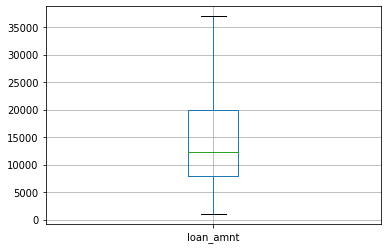

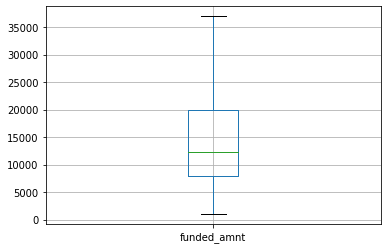

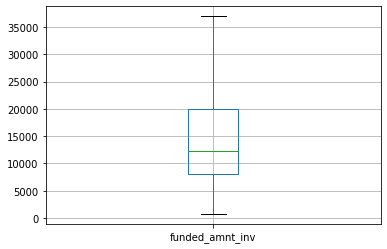

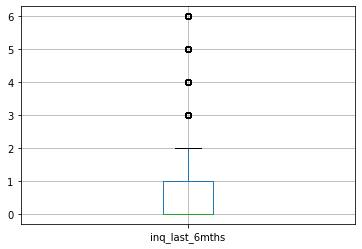

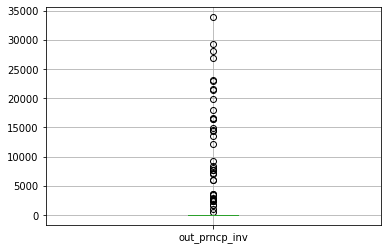

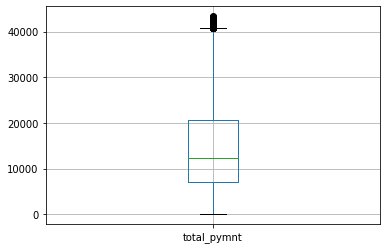

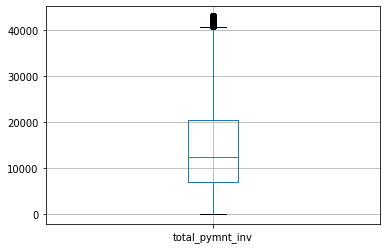

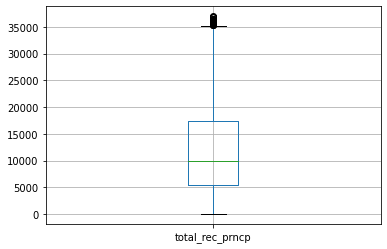

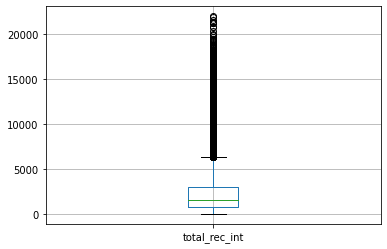

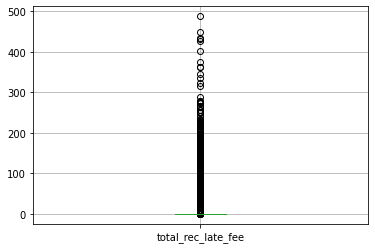

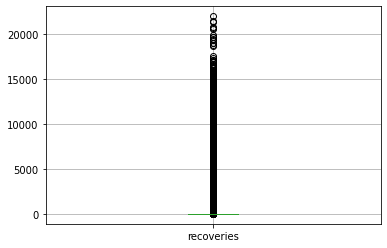

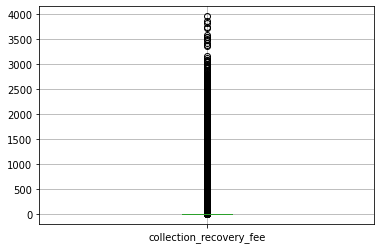

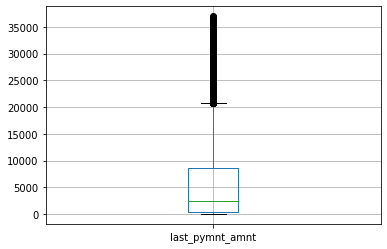

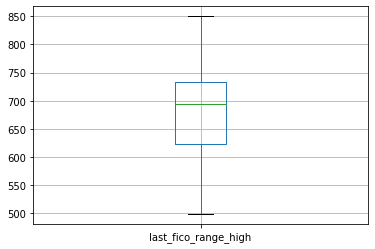

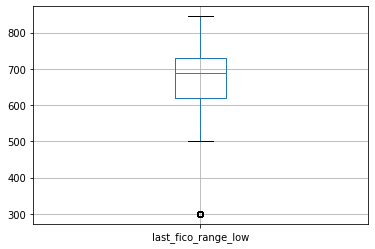

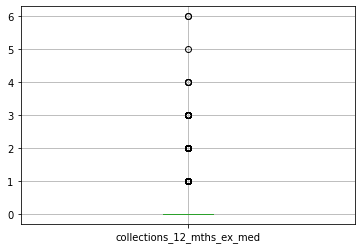

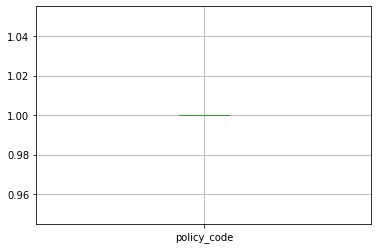

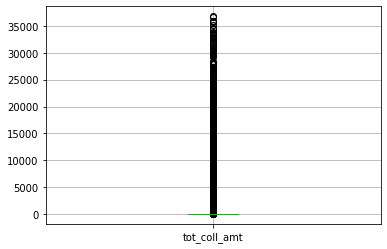

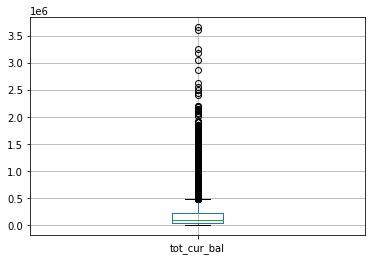

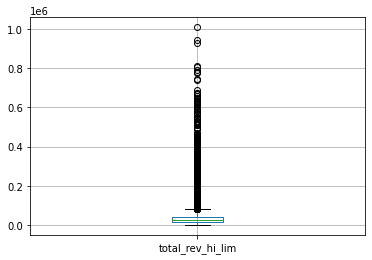

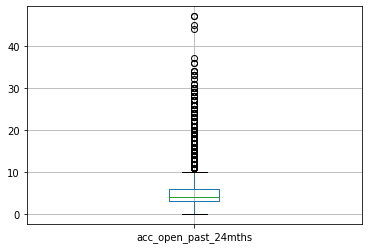

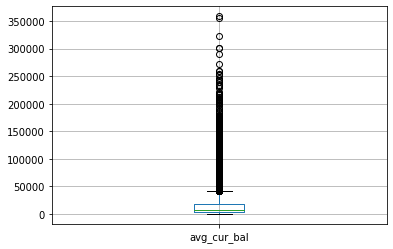

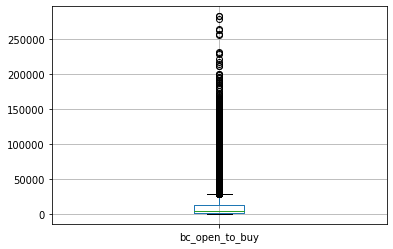

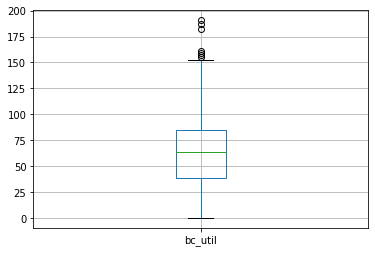

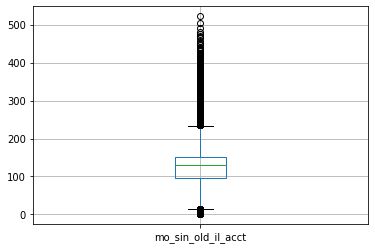

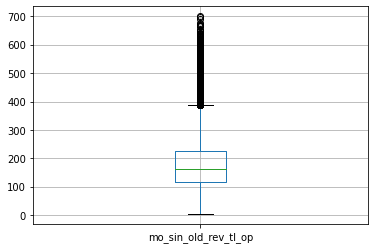

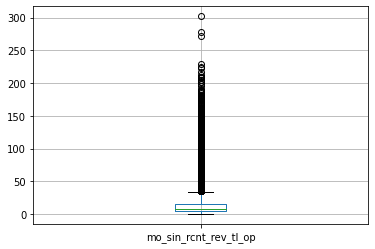

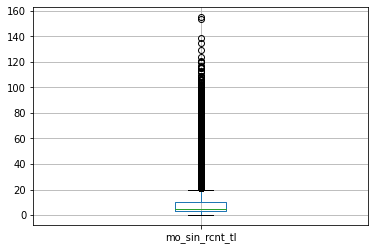

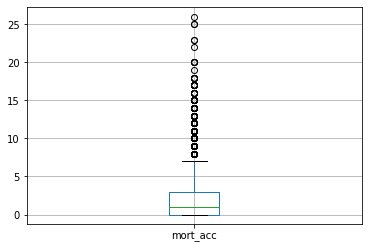

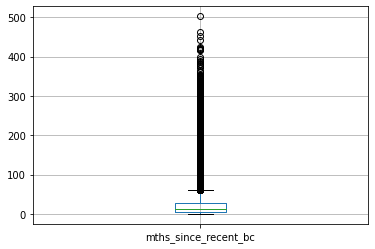

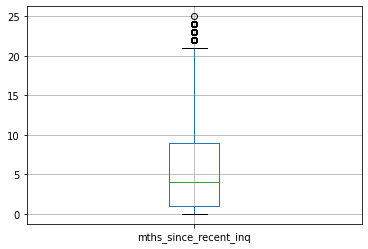

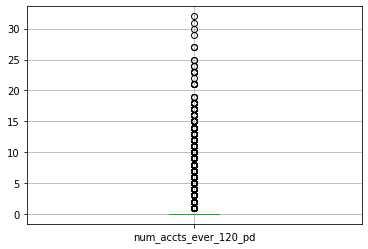

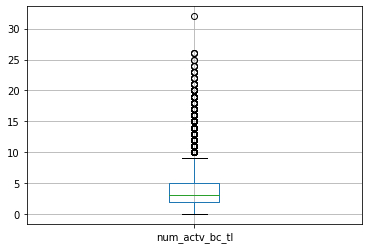

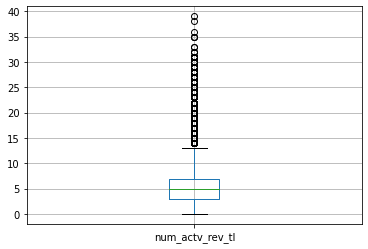

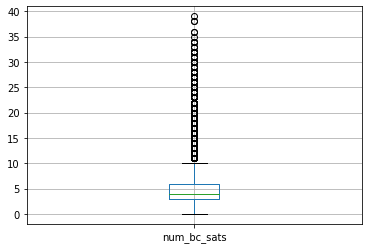

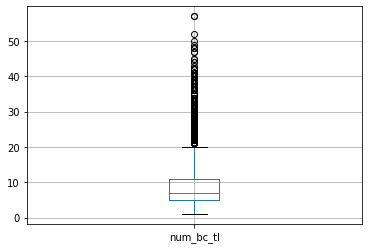

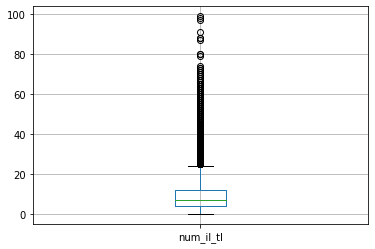

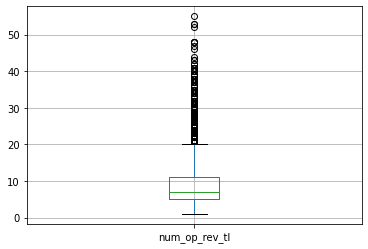

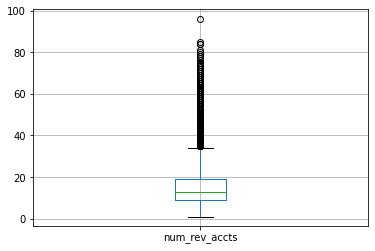

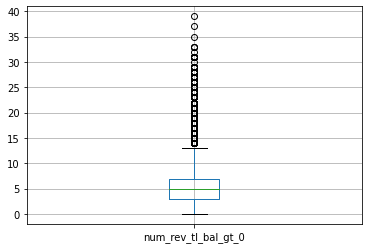

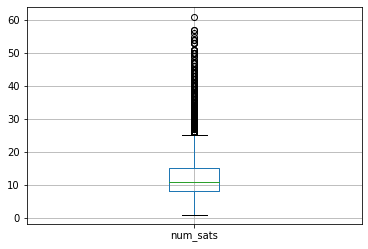

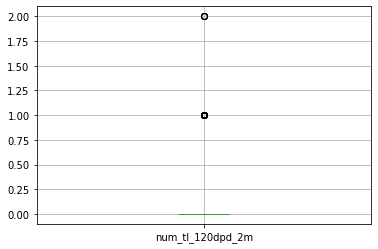

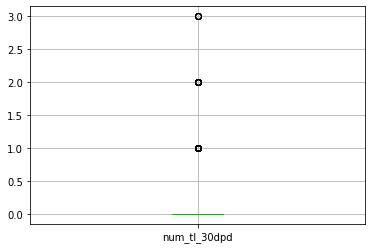

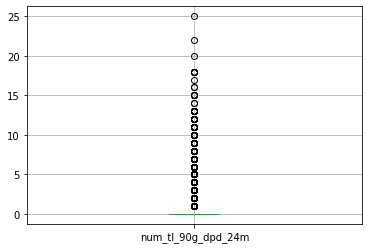

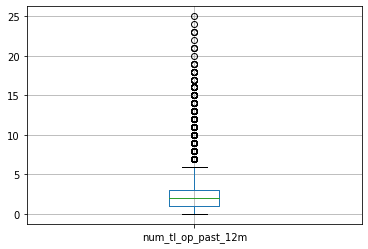

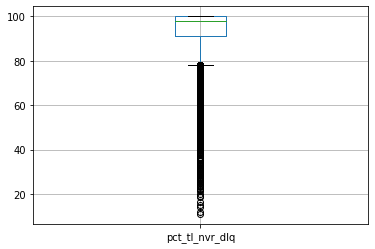

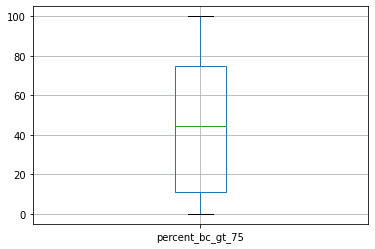

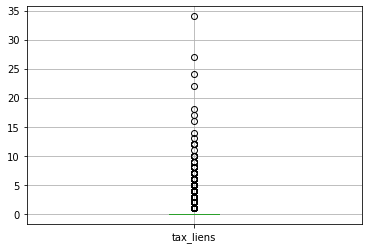

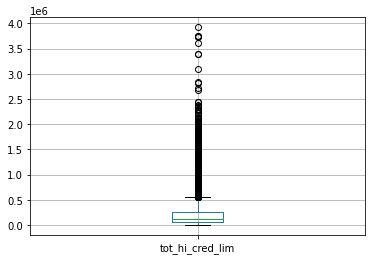

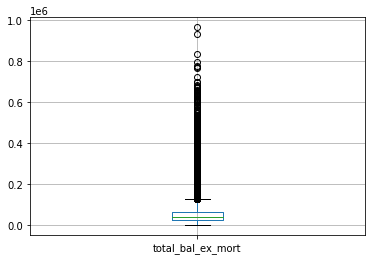

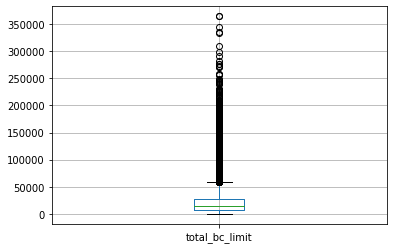

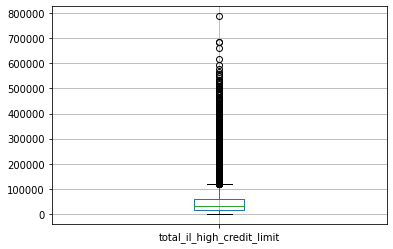

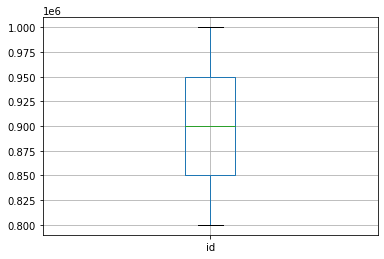

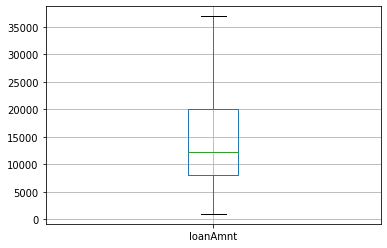

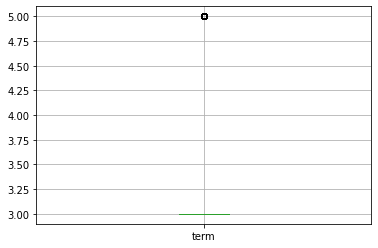

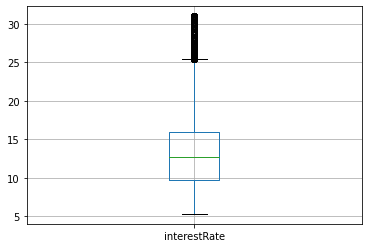

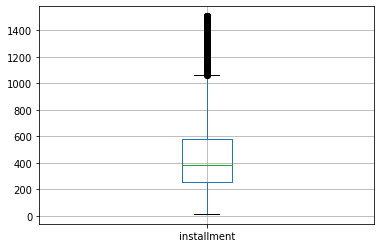

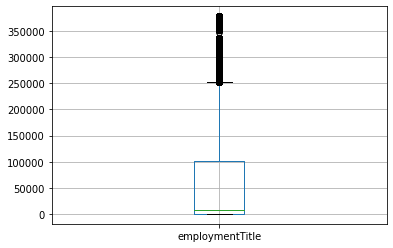

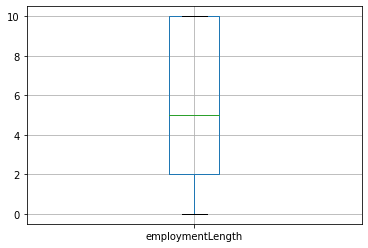

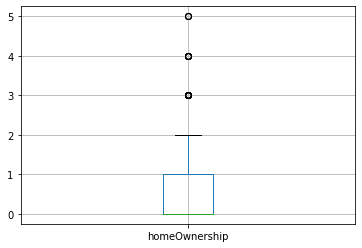

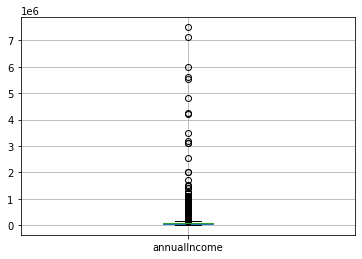

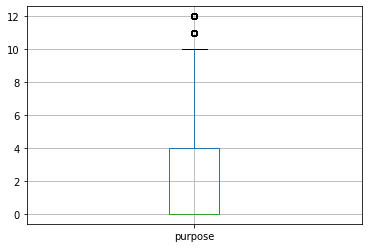

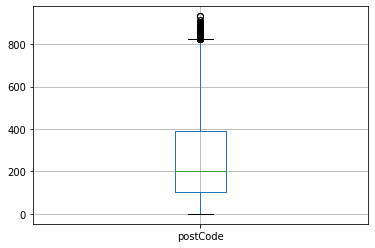

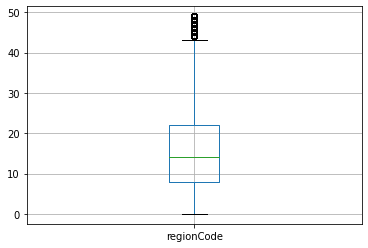

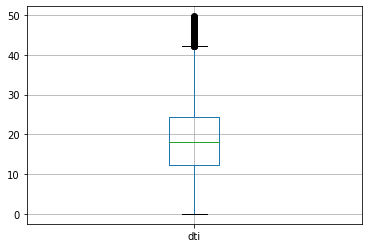

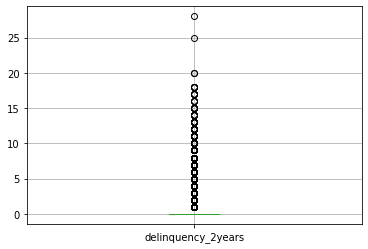

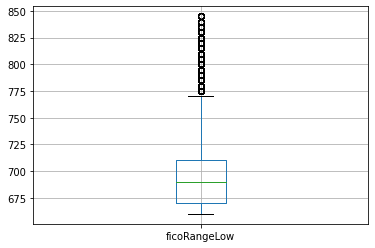

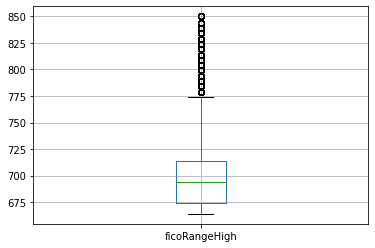

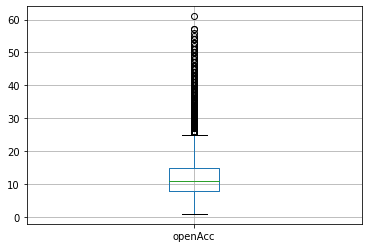

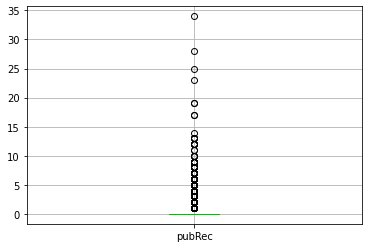

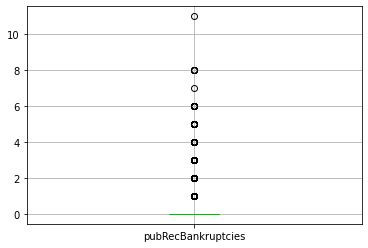

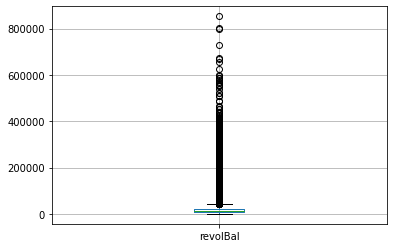

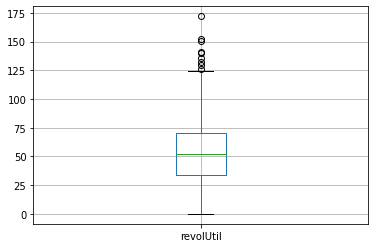

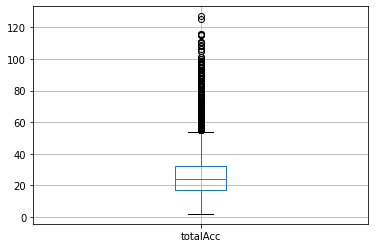

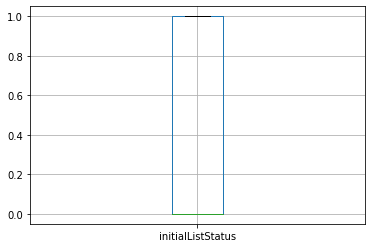

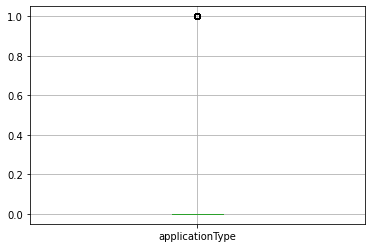

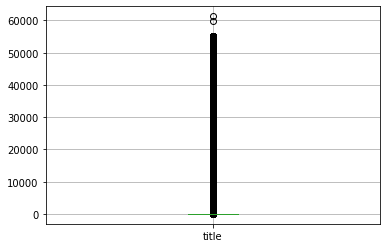

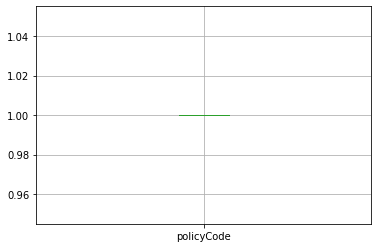

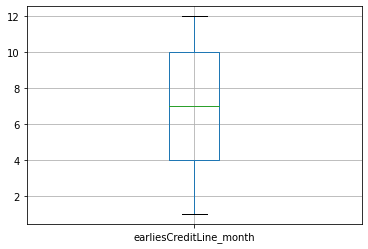

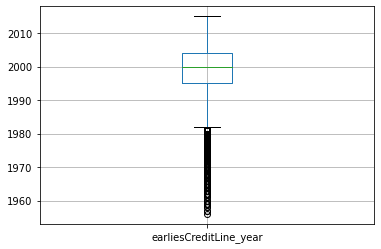

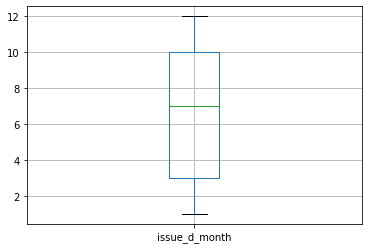

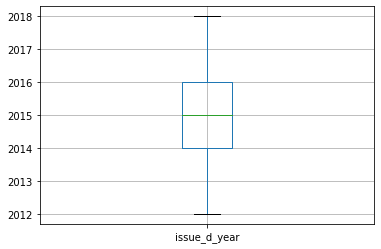

In [209]:
test_num_data=test_data.select_dtypes(exclude=['object'])

for column in test_num_data:
    plt.figure()
    test_num_data.boxplot([column])

In [14]:
test_data = test_data[test_data.last_fico_range_high != 0]

x = test_data.loc[:,'last_fico_range_low'].replace(0,300)
test_data.loc[:,'last_fico_range_low'] = x.copy()

test_data = test_data.loc[test_data.tot_coll_amt<37000,:]

test_data = test_data.loc[test_data.funded_amnt<37000,:]

test_data = test_data.loc[test_data.total_pymnt<45000,:]

test_data = test_data.loc[test_data.total_pymnt_inv<43000,:]

test_data = test_data.loc[test_data.total_rec_int<22000,:]

test_data = test_data.loc[test_data.total_rec_late_fee<550,:]

test_data = test_data.loc[test_data.recoveries<24000,:]

test_data = test_data.loc[test_data.last_pymnt_amnt<37000,:]

test_data = test_data.loc[test_data.tot_cur_bal<4000000,:]

test_data = test_data.loc[test_data.total_rev_hi_lim<8000000,:]

test_data = test_data.loc[test_data.acc_open_past_24mths<55,:]

test_data = test_data.loc[test_data.avg_cur_bal<370000,:]

test_data = test_data.loc[test_data.bc_open_to_buy<310000,:]

test_data = test_data.loc[test_data.mo_sin_old_il_acct<600,:]

test_data = test_data.loc[test_data.mo_sin_old_rev_tl_op<730,:]

test_data = test_data.loc[test_data.mo_sin_rcnt_rev_tl_op<330,:]

test_data = test_data.loc[test_data.mo_sin_rcnt_tl<200,:]

test_data = test_data.loc[test_data.mort_acc<27,:]

test_data = test_data.loc[test_data.mths_since_recent_bc<510,:]

test_data = test_data.loc[test_data.num_actv_rev_tl<40,:]

test_data = test_data.loc[test_data.num_bc_sats<40,:]

test_data = test_data.loc[test_data.num_bc_tl<60,:]

test_data = test_data.loc[test_data.num_il_tl<110,:]

test_data = test_data.loc[test_data.num_op_rev_tl<60,:]

test_data = test_data.loc[test_data.num_rev_accts<100,:]

test_data = test_data.loc[test_data.num_sats<70,:]

test_data = test_data.loc[test_data.num_tl_op_past_12m<27,:]

test_data = test_data.loc[test_data.tax_liens<80,:]

test_data = test_data.loc[test_data.total_bal_ex_mort<3000000,:]

test_data = test_data.loc[test_data.total_bc_limit<450000,:]

test_data = test_data.loc[test_data.total_il_high_credit_limit<1700000,:]

test_data = test_data.loc[test_data.annualIncome<8000000,:]

test_data = test_data.loc[test_data.dti<60,:]

test_data = test_data.loc[test_data.delinquency_2years<35,:]

test_data = test_data.loc[test_data.openAcc<65,:]

test_data = test_data.loc[test_data.pubRec<50,:]

test_data = test_data.loc[test_data.revolBal<1600000,:]

test_data = test_data.loc[test_data.revolUtil<175,:]

test_data = test_data.loc[test_data.total_rev_hi_lim<1500000,:]

test_data = test_data.loc[test_data.bc_util<225,:]

test_data = test_data.loc[test_data.mo_sin_old_il_acct<600,:]

test_data = test_data.loc[test_data.tax_liens<40,:]

test_data = test_data.loc[test_data.total_bal_ex_mort<1000000,:]

test_data = test_data.loc[test_data.total_bc_limit<375000,:]

test_data = test_data.loc[test_data.total_il_high_credit_limit<1200000,:]

In [3]:
train_data.to_csv("D://C Drive Documents//International Datathon//train_final.csv",index = False)

In [16]:
test_data.to_csv("D://C Drive Documents//International Datathon//test_final.csv",index = False)

In [4]:
train_data = pd.read_csv("D://C Drive Documents//International Datathon//train_final.csv")

c:\users\91836\appdata\local\programs\python\python38\lib\site-packages\IPython\core\interactiveshell.py:3417: DtypeWarning: Columns (70) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [5]:
test_data = pd.read_csv("D://C Drive Documents//International Datathon//test_final.csv")

In [159]:
train_data

loan_amnt  funded_amnt  funded_amnt_inv   issue_d  loan_status  \
0            5000         5000           5000.0  Apr-2015  Charged Off   
1            7000         7000           7000.0  Apr-2015  Charged Off   
2            6000         6000           6000.0  Apr-2015  Charged Off   
3           15000        15000          14900.0  Apr-2015  Charged Off   
4           11000        11000          11000.0  Apr-2015  Charged Off   
...           ...          ...              ...       ...          ...   
176453      13825        13825          13825.0  Apr-2014   Fully Paid   
176454      18000        18000          18000.0  Apr-2014   Fully Paid   
176455      12975        12975          12975.0  Apr-2014   Fully Paid   
176456       7250         7250           7250.0  Apr-2014   Fully Paid   
176457      10375        10375          10350.0  Apr-2014   Fully Paid   

       zip_code  inq_last_6mths  out_prncp_inv   total_pymnt  total_pymnt_inv  \
0         400xx             1.0            0.0   3164.040000          3164.04   
1         467xx             2.0            0.0   4300.400000          4300.40   
2         180xx             3.0            0.0   3889.970000          3889.97   
3         704xx             3.0            0.0  12894.070000         12808.11   
4         480xx             1.0            0.0   2279.910000          2279.91   
...         ...             ...            ...           ...              ...   
176453    902xx             0.0            0.0  16811.100014         16811.10   
176454    107xx             0.0            0.0  19741.470000         19741.47   
176455    113xx             0.0            0.0  16307.161059         16307.16   
176456    906xx             0.0            0.0   7691.822921          7691.82   
176457    598xx             0.0            0.0  11930.109631         11901.36   

        ...  initialListStatus  applicationType  earliesCreditLine  title  \
0       ...                  1                0           Jul-2000    0.0   
1       ...                  1                0           Jan-1996    4.0   
2       ...                  1                0           Nov-1991    0.0   
3       ...                  1                0           Mar-1995    5.0   
4       ...                  1                0           Jul-2001    0.0   
...     ...                ...              ...                ...    ...   
176453  ...                  1                0           Oct-2004    0.0   
176454  ...                  1                0           Nov-1991    4.0   
176455  ...                  1                0           May-2004    0.0   
176456  ...                  1                0           Dec-2005    0.0   
176457  ...                  1                0           Jul-2006    0.0   

        policyCode isDefault  earliesCreditLine_month earliesCreditLine_year  \
0                1       1.0                        7                   2000   
1                1       1.0                        1                   1996   
2                1       1.0                       11                   1991   
3                1       1.0                        3                   1995   
4                1       1.0                        7                   2001   
...            ...       ...                      ...                    ...   
176453           1       0.0                       10                   2004   
176454           1       0.0                       11                   1991   
176455           1       0.0                        5                   2004   
176456           1       0.0                       12                   2005   
176457           1       0.0                        7                   2006   

        issue_d_month  issue_d_year  
0                   4          2015  
1                   4          2015  
2                   4          2015  
3                   4          2015  
4                   4          2015  
...               ...           

In [19]:
given_test_data = pd.read_excel("D://C Drive Documents//International Datathon//testA.xlsx")

In [20]:
test_data= given_test_data.join(test_data,  how='left',rsuffix = "_remove").drop(['id_remove',
       'loanAmnt_remove', 'term_remove', 'interestRate_remove',
       'installment_remove', 'grade_remove', 'subGrade_remove',
       'employmentTitle_remove', 'employmentLength_remove',
       'homeOwnership_remove', 'annualIncome_remove',
       'verificationStatus_remove', 'purpose_remove', 'postCode_remove',
       'regionCode_remove', 'dti_remove', 'delinquency_2years_remove',
       'ficoRangeLow_remove', 'ficoRangeHigh_remove', 'openAcc_remove',
       'pubRec_remove', 'pubRecBankruptcies_remove', 'revolBal_remove',
       'revolUtil_remove', 'totalAcc_remove', 'initialListStatus_remove',
       'applicationType_remove', 'earliesCreditLine_remove', 'title_remove',
       'policyCode_remove'],axis=1)

In [21]:
test_data.shape

(200000, 109)

In [94]:
(test_data.isnull().sum() / test_data.shape[0] * 100)[0:50]

id                       0.0
loanAmnt                 0.0
term                     0.0
interestRate             0.0
installment              0.0
grade                    0.0
subGrade                 0.0
employmentTitle          0.0
employmentLength         0.0
homeOwnership            0.0
annualIncome             0.0
verificationStatus       0.0
issueDate                0.0
purpose                  0.0
postCode                 0.0
regionCode               0.0
dti                      0.0
delinquency_2years       0.0
ficoRangeLow             0.0
ficoRangeHigh            0.0
openAcc                  0.0
pubRec                   0.0
pubRecBankruptcies       0.0
revolBal                 0.0
revolUtil                0.0
totalAcc                 0.0
initialListStatus        0.0
applicationType          0.0
earliesCreditLine        0.0
title                    0.0
policyCode               0.0
num_accts_ever_120_pd    0.0
num_actv_bc_tl           0.0
num_actv_rev_tl          0.0
num_bc_sats   

In [23]:
test_data.loc[test_data.dti.isna(),'dti'] = test_data.dti.median()

In [24]:
test_data.loc[test_data.pubRecBankruptcies.isna(),'pubRecBankruptcies'] = test_data.pubRecBankruptcies.median()

In [25]:
test_data.loc[test_data.revolUtil.isna(),'revolUtil'] = test_data.revolUtil.median()

In [26]:
test_data = test_data.drop(['n3'],axis=1)

In [30]:
test_data = test_data.drop(['num_accts_ever_120_pd','num_actv_bc_tl','num_actv_rev_tl','num_bc_sats','num_bc_tl','num_il_tl','num_op_rev_tl','num_rev_accts','num_rev_tl_bal_gt_0','num_sats','num_tl_120dpd_2m','num_tl_30dpd','num_tl_90g_dpd_24m','num_tl_op_past_12m'],axis=1)

In [32]:
test_data.rename(columns = dict(zip(list(test_data.loc[:,[col for col in test_data.columns if col.startswith('n')][:14]].columns),['num_accts_ever_120_pd','num_actv_bc_tl','num_actv_rev_tl','num_bc_sats','num_bc_tl','num_il_tl','num_op_rev_tl','num_rev_accts','num_rev_tl_bal_gt_0','num_sats','num_tl_120dpd_2m','num_tl_30dpd','num_tl_90g_dpd_24m','num_tl_op_past_12m'])),inplace = True)

In [40]:
simple_imputer = SimpleImputer(strategy = 'median')
test_data[['num_accts_ever_120_pd','num_actv_bc_tl','num_actv_rev_tl','num_bc_sats','num_bc_tl','num_il_tl','num_op_rev_tl','num_rev_accts','num_rev_tl_bal_gt_0','num_sats','num_tl_120dpd_2m','num_tl_30dpd','num_tl_90g_dpd_24m','num_tl_op_past_12m']] = pd.DataFrame(simple_imputer.fit_transform(test_data[['num_accts_ever_120_pd','num_actv_bc_tl','num_actv_rev_tl','num_bc_sats','num_bc_tl','num_il_tl','num_op_rev_tl','num_rev_accts','num_rev_tl_bal_gt_0','num_sats','num_tl_120dpd_2m','num_tl_30dpd','num_tl_90g_dpd_24m','num_tl_op_past_12m']]),columns = ['num_accts_ever_120_pd','num_actv_bc_tl','num_actv_rev_tl','num_bc_sats','num_bc_tl','num_il_tl','num_op_rev_tl','num_rev_accts','num_rev_tl_bal_gt_0','num_sats','num_tl_120dpd_2m','num_tl_30dpd','num_tl_90g_dpd_24m','num_tl_op_past_12m'],index = test_data.index).copy() 

In [62]:
test_data.issue_d_month = test_data.issueDate.dt.month.copy()

In [63]:
test_data.issue_d_year = test_data.issueDate.dt.year.copy()

In [66]:
test_data = test_data.drop(['loan_status','zip_code'],axis=1)

In [77]:
test_data = test_data.drop(['issue_d'],axis=1)

In [79]:
numerical_cols = [col for col in test_data.iloc[:,45:95].columns if test_data.iloc[:,45:95][col].dtype != 'object']

In [81]:
object_cols =  [col for col in test_data.iloc[:,45:95].columns if test_data.iloc[:,45:95][col].dtype == 'object']

In [82]:
simple_imputer = SimpleImputer(strategy = 'median')
test_data[numerical_cols] = pd.DataFrame(simple_imputer.fit_transform(test_data[numerical_cols]),columns = numerical_cols,index = test_data.index).copy() 

In [84]:
simple_imputer = SimpleImputer(strategy = 'most_frequent')
test_data[object_cols] = pd.DataFrame(simple_imputer.fit_transform(test_data[object_cols]),columns = object_cols,index = test_data.index).copy() 

In [92]:
test_data.employmentLength.value_counts().index[0]

'10+ years'

In [93]:
conditions = [
    (test_data['employmentLength'] == '< 1 year'),
    (test_data['employmentLength'] == '1 year'),
    (test_data['employmentLength'] == '2 years'),
    (test_data['employmentLength'] == '3 years'),
    (test_data['employmentLength'] == '4 years'),
    (test_data['employmentLength'] == '5 years'),
    (test_data['employmentLength'] == '6 year'),
    (test_data['employmentLength'] == '7 years'),
    (test_data['employmentLength'] == '8 years'),
    (test_data['employmentLength'] == '9 years'),
    (test_data['employmentLength'] == '10+ years'),
    (test_data['employmentLength'].isna())
]

# create a list of the values we want to assign for each condition
values = [0,1,2,3,4,5,6,7,8,9,10,11]

# create a new column and use np.select to assign values to it using our lists as arguments
test_data['employmentLength'] = np.select(conditions, values)

test_data.loc[test_data['employmentLength'] == 11,'employmentLength'] = test_data.employmentLength.value_counts().index[0]

In [110]:
test_data.to_csv("D://C Drive Documents//International Datathon//test_final.csv",index = False)

# Correlation and Time-Series Analysis

In [101]:
plt.figure(figsize = (50,50))
df_corr = train_data.corr() # Generate correlation matrix

fig = go.Figure()
fig.add_trace(
    go.Heatmap(
        x = df_corr.columns,
        y = df_corr.index,
        z = np.array(df_corr)
    )
)

<Figure size 3600x3600 with 0 Axes>

### Chai Square Test for independence

0.0

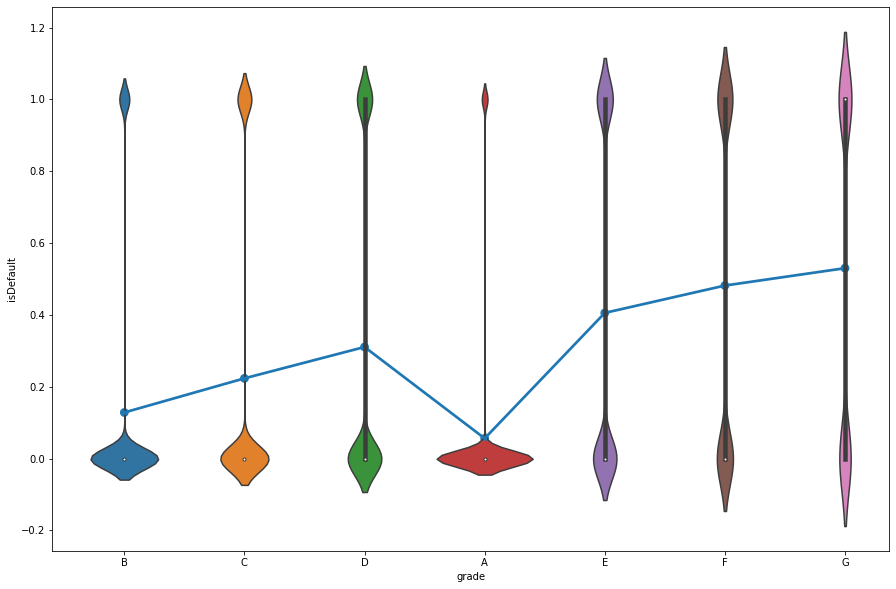

In [100]:
plt.figure(figsize=(15,10))
sns.pointplot(x=train_data["grade"],y=train_data.isDefault)
plt.plot()
sns.violinplot(x=train_data["grade"],y=train_data.isDefault)
plt.plot()

# Null theory is that the two categorical variables are independent

chi2,p,dof,expected = chi2_contingency(np.array(pd.crosstab(train_data['grade'],train_data['isDefault'])))
p

(54843.568390051725, 0.0)

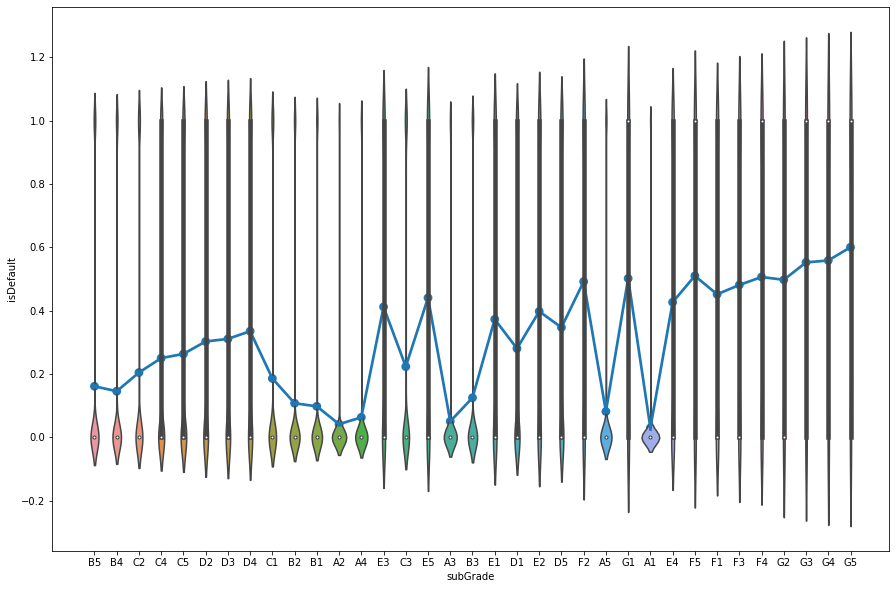

In [106]:
plt.figure(figsize=(15,10))
sns.pointplot(x=train_data["subGrade"],y=train_data.isDefault)
plt.plot()
sns.violinplot(x=train_data["subGrade"],y=train_data.isDefault)
plt.plot()

# Null theory is that the two categorical variables are independent

chi2,p,dof,expected = chi2_contingency(np.array(pd.crosstab(train_data['subGrade'],train_data['isDefault'])))
chi2,p
# p value less than 0.05 and thus we reject the null hypothesis - they are dependent

(186.94175148169109, 1.7956764950475666e-35)

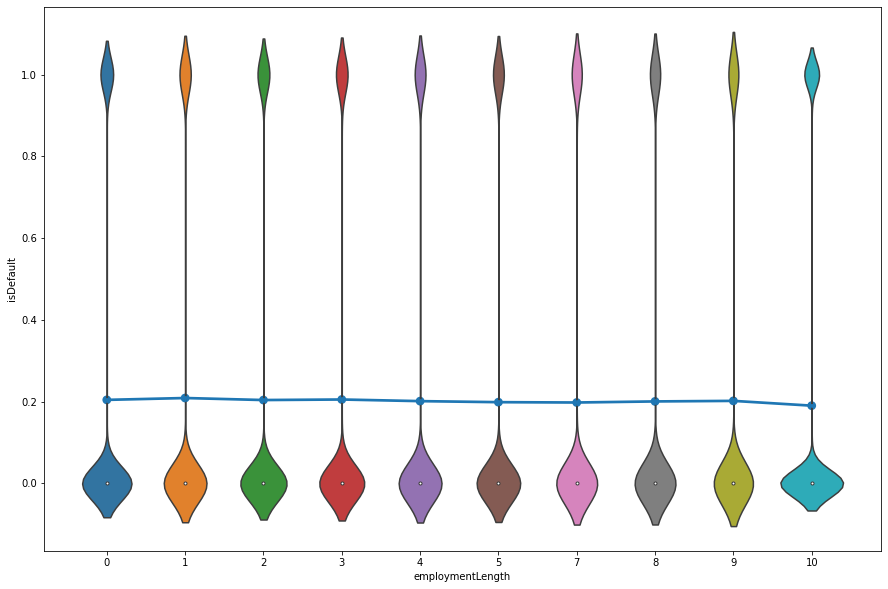

In [107]:
plt.figure(figsize=(15,10))
sns.pointplot(x=train_data["employmentLength"],y=train_data.isDefault)
plt.plot()
sns.violinplot(x=train_data["employmentLength"],y=train_data.isDefault)
plt.plot()

# Null theory is that the two categorical variables are independent

chi2,p,dof,expected = chi2_contingency(np.array(pd.crosstab(train_data['employmentLength'],train_data['isDefault'])))
chi2,p

# p value greater than 0.05(significance level) and thus we fail to reject the null hypothesis - could be independent

In [109]:
chi2,p,dof,expected = chi2_contingency(np.array(pd.crosstab(data['earliesCreditLine'],data['isDefault'])))
chi2, p
# p value less than 0.05 and thus we reject the null hypothesis - they are dependent

(3186.4777820627914, 2.674360050889579e-306)

<AxesSubplot:>

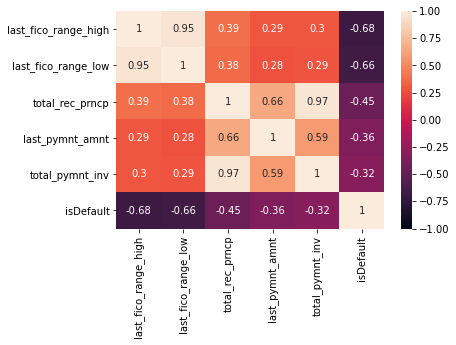

In [14]:
sns.heatmap(train_data[anova_features[:5] + ['isDefault']].corr(),vmin=-1,vmax=1,annot = True) 

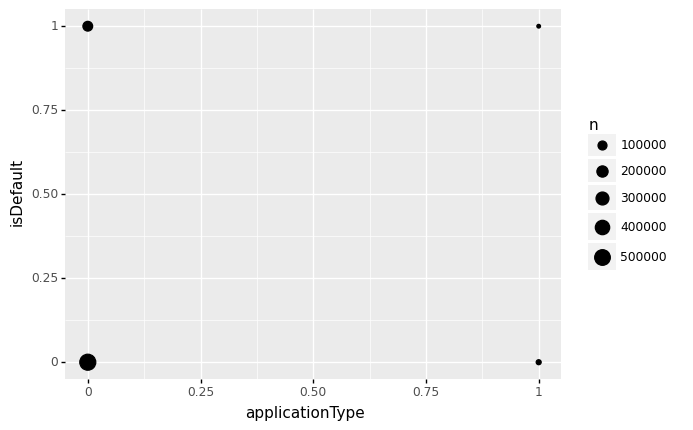

<ggplot: (145812798166)>

In [106]:
ggplot(train_data,aes(x='applicationType',y='isDefault')) + plotnine.geom_count()

In [140]:
time_series_year = train_data.groupby('issue_d_year').isDefault.sum().reset_index()

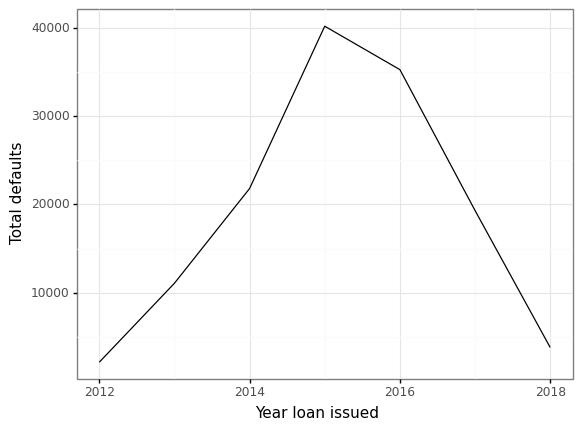

<ggplot: (145812328798)>

In [141]:
ggplot(time_series_year,aes(x='issue_d_year',y='isDefault')) + plotnine.geom_line() + plotnine.theme_bw() + plotnine.labs(x= 'Year loan issued',y = 'Total defaults')

In [143]:
time_series_month = train_data.groupby('issue_d_month').isDefault.sum().reset_index()

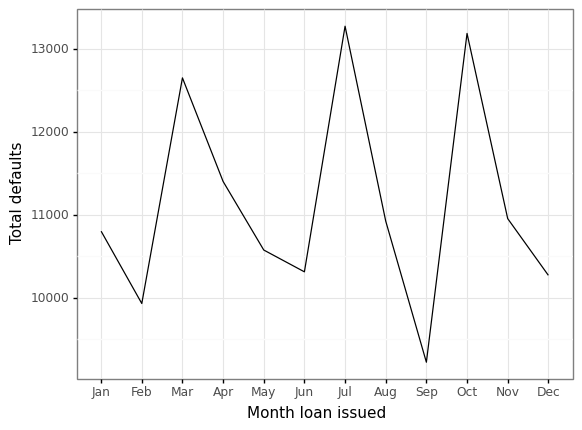

<ggplot: (145821888311)>

In [178]:
ggplot(time_series_month,aes(x='issue_d_month',y='isDefault')) + plotnine.geom_line() + plotnine.theme_bw() + plotnine.labs(x= 'Month loan issued',y = 'Total defaults') + plotnine.scale_x_discrete(limits = [1,2,3,4,5,6,7,8,9,10,11,12],labels = ["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]) 

In [49]:
np.abs(train_data[anova_features[:12] + ['isDefault']].groupby('isDefault').mean().iloc[0,:] - train_data[anova_features[:12] + ['isDefault']].groupby('isDefault').mean().iloc[1,:])

last_fico_range_high     138.483430
last_fico_range_low      160.151779
total_rec_prncp         9563.498930
last_pymnt_amnt         6283.046980
total_pymnt_inv         7697.411611
total_pymnt             7700.165460
interestRate               3.260631
term                       0.416420
total_rec_late_fee         3.993953
ficoRangeLow              10.553288
ficoRangeHigh             10.553422
dti                        2.349259
dtype: float64

In [96]:
plt.rcParams['figure.dpi'] = 300

[]

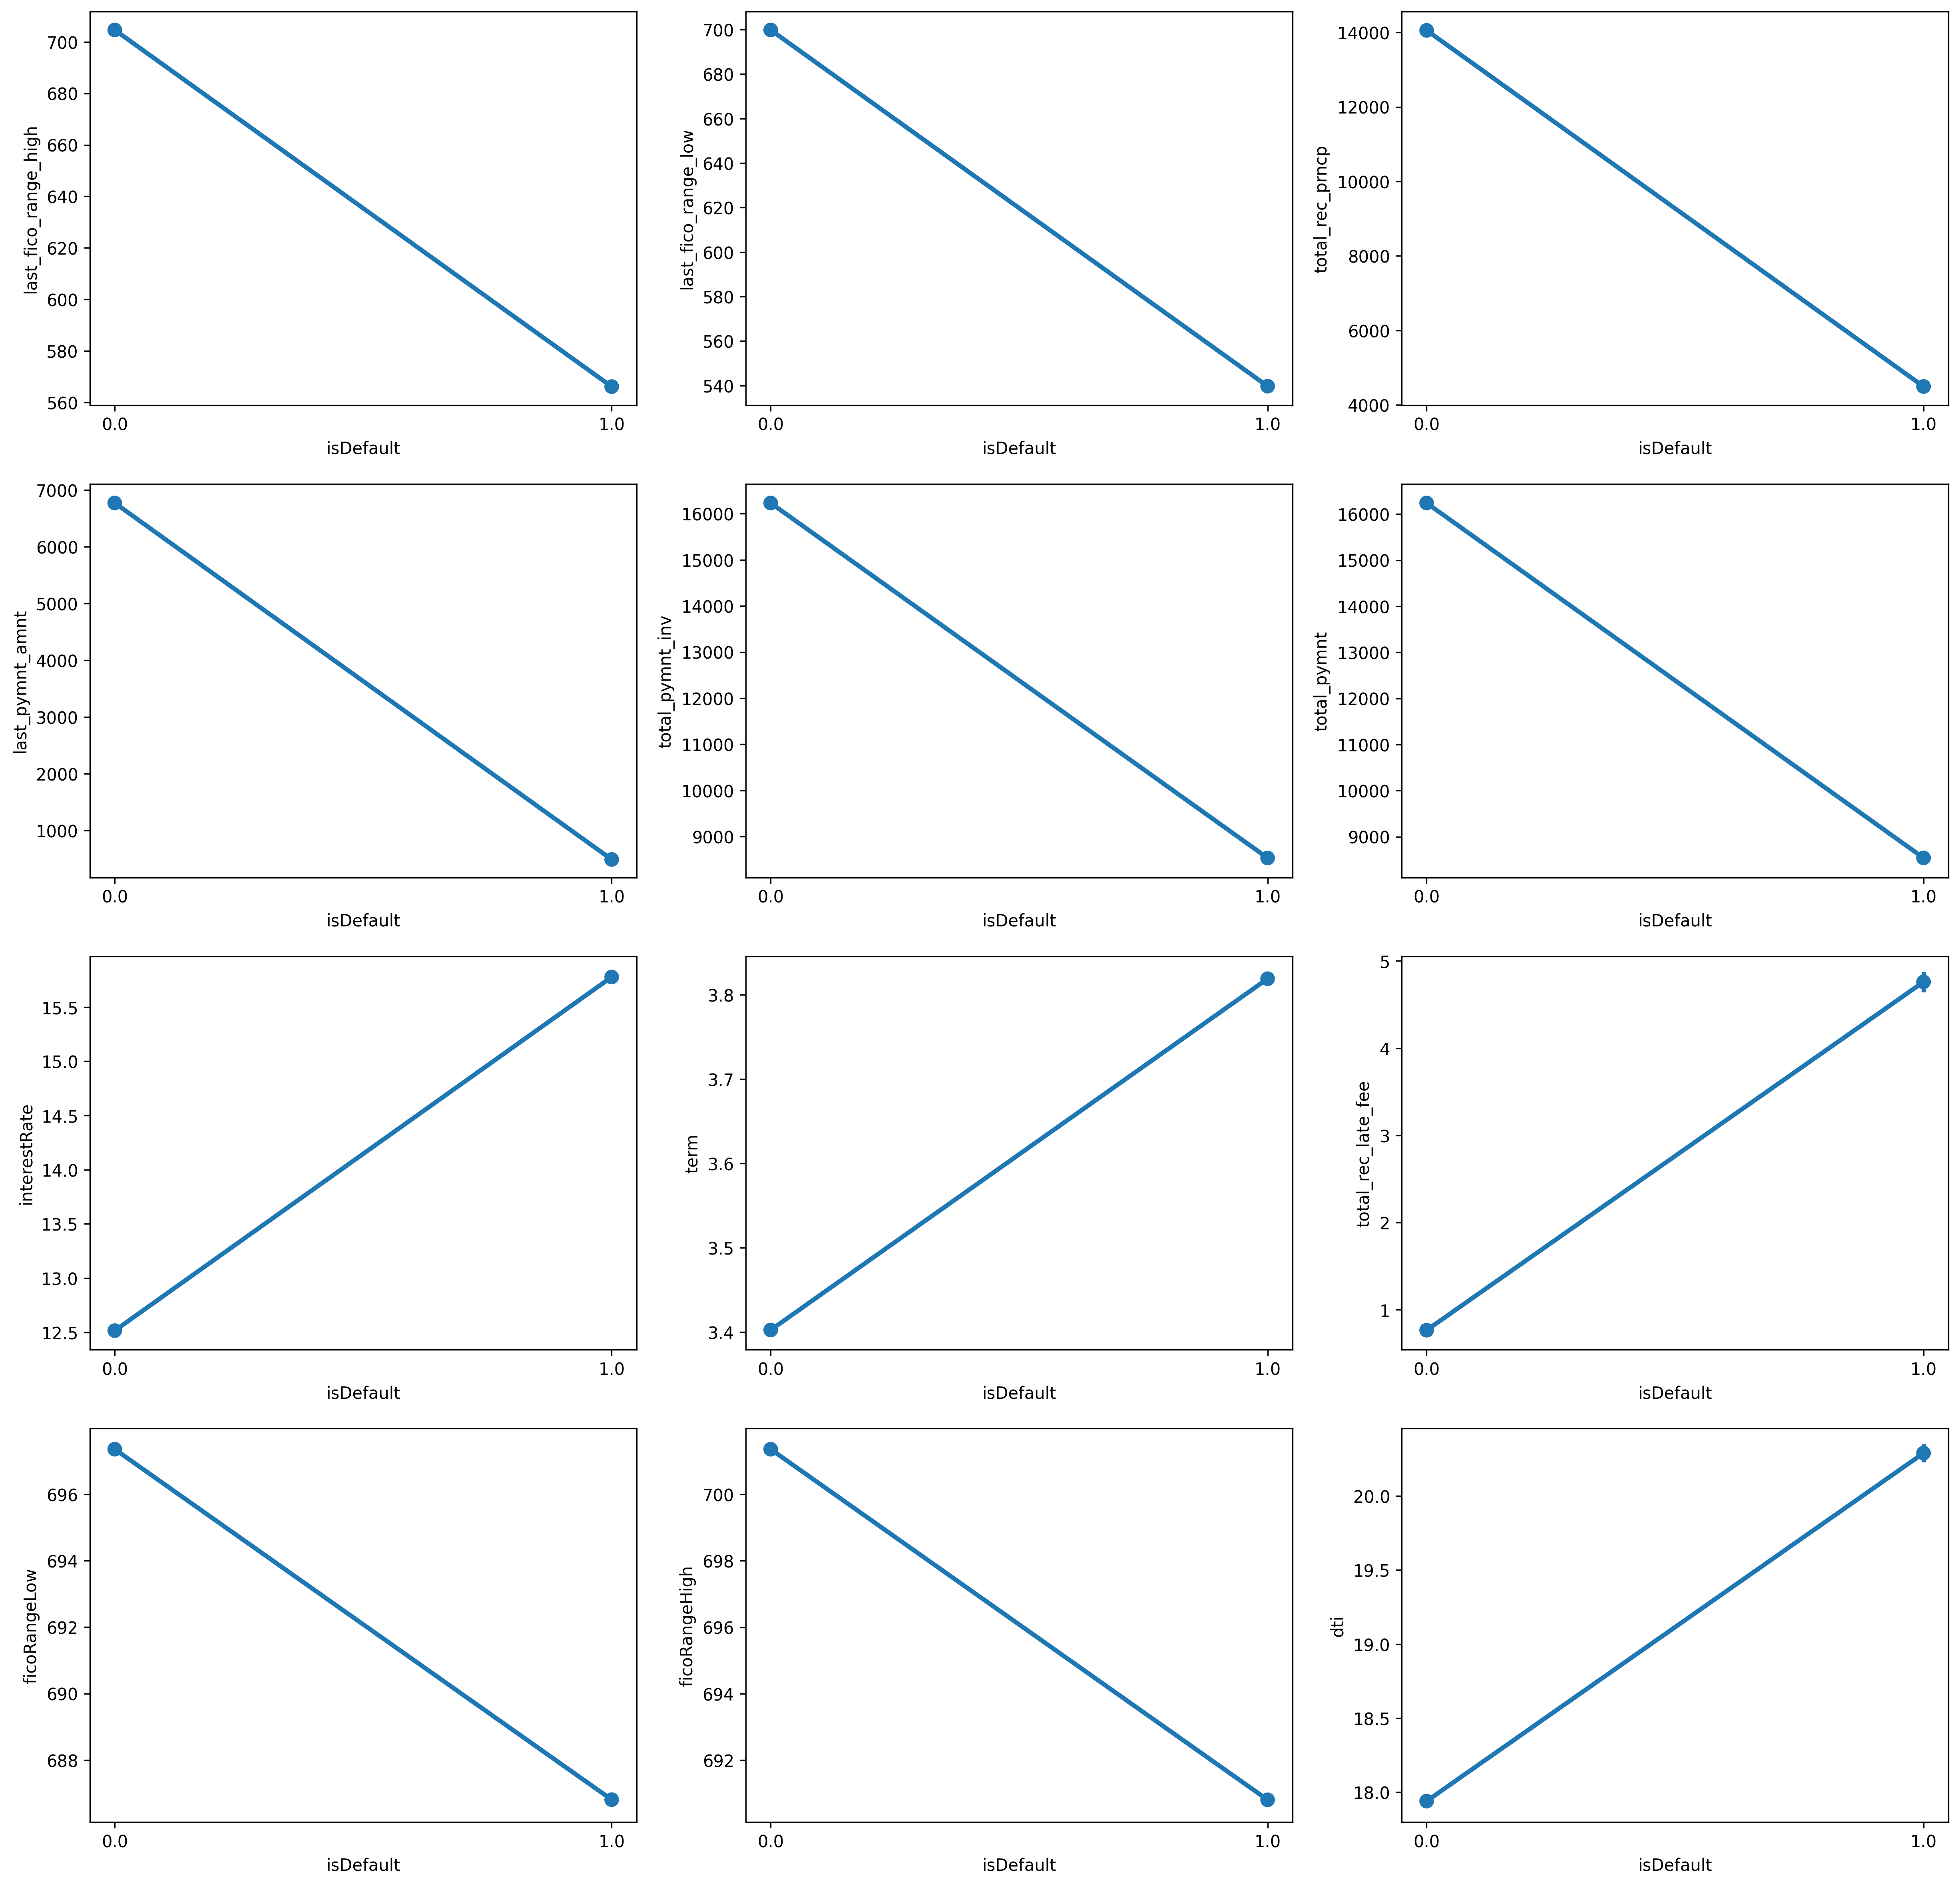

In [97]:
plt.figure(figsize= (20,20))
plt.subplot(4,3,1)
sns.pointplot(x=train_data["isDefault"],y=train_data.last_fico_range_high)
plt.plot()
plt.subplot(4,3,2)
sns.pointplot(x=train_data["isDefault"],y=train_data.last_fico_range_low)
plt.plot()
plt.subplot(4,3,3)
sns.pointplot(x=train_data["isDefault"],y=train_data.total_rec_prncp)
plt.plot()
plt.subplot(4,3,4)
sns.pointplot(x=train_data["isDefault"],y=train_data.last_pymnt_amnt)
plt.plot()
plt.subplot(4,3,5)
sns.pointplot(x=train_data["isDefault"],y=train_data.total_pymnt_inv)
plt.plot()
plt.subplot(4,3,6)
sns.pointplot(x=train_data["isDefault"],y=train_data.total_pymnt)
plt.plot()
plt.subplot(4,3,7)
sns.pointplot(x=train_data["isDefault"],y=train_data.interestRate)
plt.plot()
plt.subplot(4,3,8)
sns.pointplot(x=train_data["isDefault"],y=train_data.term)
plt.plot()
plt.subplot(4,3,9)
sns.pointplot(x=train_data["isDefault"],y=train_data.total_rec_late_fee)
plt.plot()
plt.subplot(4,3,10)
sns.pointplot(x=train_data["isDefault"],y=train_data.ficoRangeLow)
plt.plot()
plt.subplot(4,3,11)
sns.pointplot(x=train_data["isDefault"],y=train_data.ficoRangeHigh)
plt.plot()
plt.subplot(4,3,12)
sns.pointplot(x=train_data["isDefault"],y=train_data.dti)
plt.plot()

<AxesSubplot:>

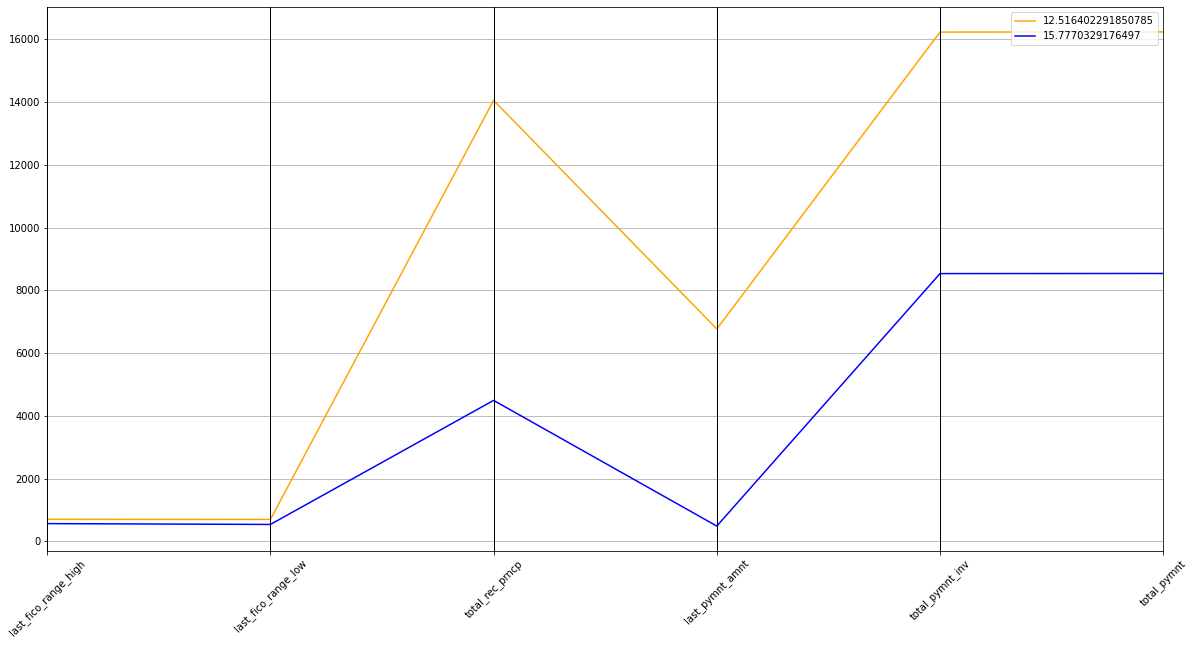

In [82]:
plt.figure(figsize = (20,10))
plt.xticks(rotation=45)
pd.plotting.parallel_coordinates(train_data[anova_features[:7] + ['isDefault']].groupby('isDefault').mean(),'interestRate', color=('orange',  'blue'))

# Preparation of Dataset for modelling

__Removing recovery related features__

In [11]:
train_data = train_data.drop(['recoveries','collection_recovery_fee'],axis = 1)
test_data = test_data.drop(['recoveries','collection_recovery_fee'],axis = 1)

In [132]:
X = train_data[[col for col in train_data.columns if train_data[col].dtype != 'object']]
X = X.drop('isDefault', axis=1)

# X = X[random.sample(list(X.columns),20)]

# Correlation Features
# X = X[list(corr_features.index)[1:]]

# ANOVA F test features
X = X[anova_features]

# Mutual Information Features
# X = X[mi_features]

# Random Forest Features based on feature importance
# X = X[rf_features]


# X = X.drop(['recoveries','collection_recovery_fee'],axis = 1)

y = train_data['isDefault']

In [130]:
def roc_auc_validation_score(model):
    pipeline = make_pipeline(model)
    skf = StratifiedKFold(n_splits=5, random_state=31, shuffle=True)
    scorer = make_scorer(roc_auc_score)
    cv_results = cross_val_score(pipeline,X,y,cv=skf,scoring=scorer,n_jobs=-1) 
    return np.mean(cv_results)

In [46]:
def accuracy_validation_score(model):
    pipeline = make_pipeline(model)
    skf = StratifiedKFold(n_splits=5, random_state=31, shuffle=True)
    scorer = make_scorer(accuracy_score)
    cv_results = cross_val_score(pipeline,X,y,cv=skf,scoring=scorer,n_jobs=-1) 
    return cv_results

# Modelling

## XGBoost Classifier

### Features chosen based on Pearson's correlation

In [ ]:
xgbc = XGBClassifier()
roc_auc_validation_score(xgbc)

### Choosing random features

In [ ]:
xgbc = XGBClassifier()
roc_auc_validation_score(xgbc)

### Features chosen based on ANOVA F-test

In [152]:
xgbc = XGBClassifier()
roc_auc_validation_score(xgbc)

0.9985257861884242

### Features chosen based on Mutual Information

In [ ]:
xgbc = XGBClassifier()
roc_auc_validation_score(xgbc)

### Features chosen based on Random Forest Feature importance

In [ ]:
xgbc = XGBClassifier()
roc_auc_validation_score(xgbc)

## Random Forest Classifier

### Features chosen based on Pearson's correlation

In [ ]:
rfc = RandomForestClassifier()
roc_auc_validation_score(rfc)

### Choosing random features

In [ ]:
rfc = RandomForestClassifier()
roc_auc_validation_score(rfc)

### Features chosen based on ANOVA F-test

In [148]:
rfc = RandomForestClassifier()
roc_auc_validation_score(rfc)

### Features chosen based on Mutual Information

In [ ]:
rfc = RandomForestClassifier()
roc_auc_validation_score(rfc)

### Features chosen based on Random Forest Feature importance

In [ ]:
rfc = RandomForestClassifier()
roc_auc_validation_score(rfc)

## LightGBM Classifier

### Features chosen based on Pearson's correlation

In [ ]:
lgbmc = lgb.LGBMClassifier()
roc_auc_validation_score(lgbmc)

### Choosing random features

In [119]:
lgbmc = lgb.LGBMClassifier()
roc_auc_validation_score(lgbmc)

array([0.95911601, 0.95783498, 0.95855358, 0.95986878, 0.95809963])

### Features chosen based on ANOVA F-test

In [133]:
lgbmc = lgb.LGBMClassifier()
roc_auc_validation_score(lgbmc)

0.9968235007339352

### Features chosen based on Mutual Information

In [ ]:
lgbmc = lgb.LGBMClassifier()
roc_auc_validation_score(lgbmc)

### Features chosen based on Random Forest Feature importance

In [131]:
lgbmc = lgb.LGBMClassifier()
roc_auc_validation_score(lgbmc)

0.9968735353884839

## CatBoost Classifier

### Features chosen based on Pearson's correlation

In [ ]:
cbc = CatBoostClassifier()
roc_auc_validation_score(cbc)

### Choosing random features

In [ ]:
cbc = CatBoostClassifier()
roc_auc_validation_score(cbc)

### Features chosen based on ANOVA F-test

In [ ]:
cbc = CatBoostClassifier()
roc_auc_validation_score(cbc)

### Features chosen based on Mutual Information

In [ ]:
cbc = CatBoostClassifier()
roc_auc_validation_score(cbc)

### Features chosen based on Random Forest Feature importance

In [ ]:
cbc = CatBoostClassifier()
roc_auc_validation_score(cbc)

## Plotting the ROC-AUC curve

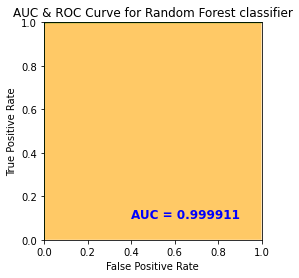

In [178]:
X_train,X_valid,y_train,y_valid = train_test_split(X,y,test_size = 0.2, random_state = 1)

rfc = RandomForestClassifier()

rfc.fit(X_train,y_train)

y_pred = rfc.predict_proba(X_valid)[:, 1]

auc = roc_auc_score(y_valid, y_pred)

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_valid, y_pred)

plt.figure(figsize=(6, 4))
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC Curve for Random Forest classifier")
plt.plot(false_positive_rate, true_positive_rate, 'g')
plt.fill_between(false_positive_rate, true_positive_rate, facecolor='orange', alpha=0.6)
plt.text(0.9, 0.1, 'AUC = %f' % auc, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

# Feature Selection

__Features are selected based on statistical tests like ANOVA F test and metrics such as mutual information. Furthermore, certain models such as Random Forest have inbuilt feature importance which helps us in determining the features that help best in reducing the impurity__

## Pearson's Correlation

In [120]:
corr_features = train_data.corr()["isDefault"].sort_values(ascending = False)[:30]

## ANOVA F-test

In [12]:
test = SelectKBest(score_func=f_classif, k='all')
fit = test.fit(train_data[[col for col in train_data.columns if train_data[col].dtype != 'object']].drop(['isDefault'],axis=1),train_data['isDefault'])
pd.DataFrame(zip( list(train_data[[col for col in train_data.columns if train_data[col].dtype != 'object']].drop(['isDefault'],axis=1).columns),fit.scores_ )).sort_values(by=1,ascending = False).head(30)

c:\users\91836\appdata\local\programs\python\python38\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [14 75] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
c:\users\91836\appdata\local\programs\python\python38\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


0              1
11  last_fico_range_high  590566.713477
12   last_fico_range_low  525862.372870
7        total_rec_prncp  170042.851966
10       last_pymnt_amnt   99340.739839
6        total_pymnt_inv   75822.224557
5            total_pymnt   75821.840180
53          interestRate   54145.596580
52                  term   26223.229662
9     total_rec_late_fee   16992.933894
64          ficoRangeLow   12448.943269
65         ficoRangeHigh   12448.787425
62                   dti    8796.353158
8          total_rec_int    7705.333023
18  acc_open_past_24mths    7650.826494
42    num_tl_op_past_12m    5559.830900
0              loan_amnt    5314.913171
51              loanAmnt    5314.913171
1            funded_amnt    5314.551717
2        funded_amnt_inv    5311.670869
20        bc_open_to_buy    4863.567085
31       num_actv_rev_tl    4163.065423
37   num_rev_tl_bal_gt_0    4004.759707
19           avg_cur_bal    3970.219218
46       tot_hi_cred_lim    3640.233529
26              mort_acc    3618.863722
44      percent_bc_gt_75    3391.239014
48        total_bc_limit    3390.352537
21               bc_util    3385.233780
54           installment    3363.048158
3         inq_last_6mths    3253.007714

In [13]:
anova_features = list(pd.DataFrame(zip( list(train_data[[col for col in train_data.columns if train_data[col].dtype != 'object']].drop(['isDefault'],axis=1).columns),fit.scores_ )).sort_values(by=1,ascending = False).head(30)[0])

## Mutual Information

In [123]:
test = SelectKBest(score_func=mutual_info_classif, k='all')
fit = test.fit(train_data[[col for col in train_data.columns if train_data[col].dtype != 'object']].drop(['isDefault'],axis=1),train_data['isDefault'])
pd.DataFrame(zip( list(train_data[[col for col in train_data.columns if train_data[col].dtype != 'object']].drop(['isDefault'],axis=1).columns),fit.scores_ )).sort_values(by=1,ascending = False).head(30)

0         1
7        total_rec_prncp  0.483521
10       last_pymnt_amnt  0.317890
12   last_fico_range_low  0.275445
11  last_fico_range_high  0.274624
75            policyCode  0.112655
14           policy_code  0.111614
5            total_pymnt  0.086533
6        total_pymnt_inv  0.085221
52                  term  0.079621
53          interestRate  0.043825
54           installment  0.034329
56      employmentLength  0.030088
43        pct_tl_nvr_dlq  0.025347
8          total_rec_int  0.022709
57         homeOwnership  0.021532
9     total_rec_late_fee  0.021223
42    num_tl_op_past_12m  0.019224
59               purpose  0.018059
64          ficoRangeLow  0.016663
72     initialListStatus  0.016603
79          issue_d_year  0.016426
65         ficoRangeHigh  0.015870
30        num_actv_bc_tl  0.015566
18  acc_open_past_24mths  0.014342
44      percent_bc_gt_75  0.013215
26              mort_acc  0.013016
3         inq_last_6mths  0.012830
31       num_actv_rev_tl  0.012470
37   num_rev_tl_bal_gt_0  0.011894
0              loan_amnt  0.010607

In [124]:
mi_features = list(pd.DataFrame(zip( list(train_data[[col for col in train_data.columns if train_data[col].dtype != 'object']].drop(['isDefault'],axis=1).columns),fit.scores_ )).sort_values(by=1,ascending = False).head(30)[0])

## Random Forest Feature Importance

In [125]:
rf = RandomForestClassifier()

fit = rf.fit(train_data[[col for col in train_data.columns if train_data[col].dtype != 'object']].drop(['isDefault'],axis=1),train_data['isDefault'])
pd.DataFrame(zip( list(train_data[[col for col in train_data.columns if train_data[col].dtype != 'object']].drop(['isDefault'],axis=1).columns),fit.feature_importances_ )).sort_values(by=1,ascending = False).head(30)

0         1
12   last_fico_range_low  0.188769
7        total_rec_prncp  0.181390
11  last_fico_range_high  0.155688
10       last_pymnt_amnt  0.106424
5            total_pymnt  0.078919
6        total_pymnt_inv  0.063160
51              loanAmnt  0.030945
2        funded_amnt_inv  0.026339
1            funded_amnt  0.025757
0              loan_amnt  0.025676
54           installment  0.022372
8          total_rec_int  0.015610
9     total_rec_late_fee  0.009883
52                  term  0.009237
53          interestRate  0.008989
79          issue_d_year  0.004101
62                   dti  0.002067
64          ficoRangeLow  0.002055
65         ficoRangeHigh  0.001801
69              revolBal  0.001453
48        total_bc_limit  0.001416
18  acc_open_past_24mths  0.001387
74                 title  0.001381
17      total_rev_hi_lim  0.001376
20        bc_open_to_buy  0.001337
55       employmentTitle  0.001333
46       tot_hi_cred_lim  0.001239
58          annualIncome  0.001183
19           avg_cur_bal  0.001129
16           tot_cur_bal  0.001081

In [126]:
rf_features = list(pd.DataFrame(zip( list(train_data[[col for col in train_data.columns if train_data[col].dtype != 'object']].drop(['isDefault'],axis=1).columns),fit.feature_importances_ )).sort_values(by=1,ascending = False).head(30)[0])

## Recursive Feature elimination on XGBoost Classification

In [ ]:
rfe = RFE(estimator = (),n_features_to_select = 7)
fit = rfe.fit(temp_cleaned_data[[col for col in temp_cleaned_data.columns if temp_cleaned_data[col].dtype != 'object']].drop(['isDefault'],axis=1), temp_cleaned_data.isDefault)
print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)
print(dict(zip( list(temp_cleaned_data[[col for col in temp_cleaned_data.columns if temp_cleaned_data[col].dtype != 'object']].drop(['isDefault'],axis=1).columns),fit.support_ )))

# Making predictions on the test dataset

__We have chosen LightGBM due to its speed and since the auc score was similar for models considered here__

In [146]:
lgbmc = lgb.LGBMClassifier()
pipeline = make_pipeline(lgbmc)
pipeline.fit(train_data[anova_features],train_data.isDefault)
pd.concat([test_data.id.map(lambda i: int(i)),pd.Series(pipeline.predict(test_data[anova_features]),name = 'isDefault',index = test_data.index)],axis=1).to_csv("D://C Drive Documents//International Datathon////Insight Miners Monash University Team 3 Output.csv",index = False)